In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

In [2]:
data = pd.read_csv('for_EDA_fixed.csv', encoding='utf-8')
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
71694                           The Front            0.00              0.00   
71695                        The Bornless            0.00              0.00   
71696                     Winter Memories            0.00              0.00   
71697  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   
71698            Pixel Gun 3D: PC Edition            0.00              0.00   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
71694              0.00           NaN   
71695              0.00           NaN   
71696              0.00           NaN   
71697              0.00           NaN   
71698              0.00           NaN   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
71694  The Front is a survival-open-world-crafting (S...   
71695  Welcome to The Bornless, an action horror FPS....   
71696  After the unforgettable summer memories you‚Äôve...   
71697  In the direct sequel to the record-breaking Ca...   
71698  Pixel Gun 3D is a near complete PC port of a l...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
71694                      NaN             NaN                 NaN   
71695                      NaN             NaN                 NaN   
71696                      NaN             NaN                 NaN   
71697                      NaN             NaN                 NaN   
71698                      NaN             NaN                 NaN   

                                               Developer           Publisher  \
0                                         Larian Studios      Larian Studios   
1                       Valve, Hidden Path Entertainment               Valve   
2                                  Respawn Entertainment     Electronic Arts   
3                                       Playground Games   Xbox Game Studios   
4      Infinity Ward, Raven Software, Beenox, Treyarc...          Activision   
...                                                  ...                 ...   
71694                                       Samar Studio        Samar Studio   
71695                                  Cathedral Studios   Cathedral Studios   
71696                                        Dojin Otome        Kagura Games   
71697  Sledgehammer Games, Treyarch, Infinity Ward, B...          Activision   
71698                                 Cubic Games Studio  Cubic Games Studio   

                                     Supported Languages  \
0

In [4]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

Original Price  Discounted Price  Price Difference  \
Original Price            1.000000          0.999953          0.999991   
Discounted Price          0.999953          1.000000          0.999905   
Price Difference          0.999991          0.999905          1.000000   
Release Date             -0.001012         -0.000969         -0.001031   
Reviews_number            0.009123          0.025858         -0.002969   
Reviews_percentage       -0.022843          0.016513         -0.034401   
Memory                   -0.000022         -0.000023         -0.000022   

                    Release Date  Reviews_number  Reviews_percentage    Memory  
Original Price         -0.001012        0.009123           -0.022843 -0.000022  
Discounted Price       -0.000969        0.025858            0.016513 -0.000023  
Price Difference       -0.001031       -0.002969           -0.034401 -0.000022  
Release Date            1.000000       -0.052814            0.158993  0.005406  
Reviews_number         -0.052814        1.000000            0.012302 -0.000426  
Reviews_percentage      0.158993        0.012302            1.000000  0.006348  
Memory                  0.005406       -0.000426            0.006348  1.000000

In [5]:
data.describe()

Original Price  Discounted Price  Price Difference  Release Date  \
count    7.169900e+04      7.169900e+04      7.169900e+04  61492.000000   
mean     5.943900e+02      1.821678e+02      4.122223e+02   2019.433813   
std      9.085828e+04      2.725981e+04      6.360028e+04      2.919596   
min      0.000000e+00      0.000000e+00      0.000000e+00   1969.000000   
25%      7.900000e-01      3.400000e-01      0.000000e+00   2018.000000   
50%      2.790000e+00      2.690000e+00      0.000000e+00   2020.000000   
75%      6.290000e+00      6.290000e+00      0.000000e+00   2022.000000   
max      1.404633e+07      4.213900e+06      9.832433e+06   2023.000000   

       Reviews_number  Reviews_percentage        Memory  
count    37481.000000        37481.000000  6.554300e+04  
mean       201.664603           76.729436  1.489957e+11  
std       1771.148316           18.005781  3.814494e+13  
min         10.000000            0.000000  0.000000e+00  
25%         19.000000           67.000000  1.000000e+00  
50%         42.000000           81.000000  2.000000e+00  
75%        133.000000           90.000000  4.000000e+00  
max     154266.000000          100.000000  9.765625e+15

In [6]:
numeric_columns = data.select_dtypes(include=np.number)

has_inf = np.isinf(numeric_columns).any().any()

if has_inf:
    print("DataFrame contiene valores infinitos.")
else:
    print("DataFrame no contiene valores infinitos.")

DataFrame no contiene valores infinitos.


# Limpieza de datos

## Ubicamos datos NA

In [7]:
data.isnull().sum()

Title                      1
Original Price             0
Discounted Price           0
Price Difference           0
Release Date           10207
Game Description         210
Reviews Summary        34218
Reviews_number         34218
Reviews_percentage     34218
Developer                220
Publisher                516
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               6326
Memory                  6156
Graphics_Series        20863
Storage_Clean           7636
dtype: int64

### Title
Empecemos por la columna Title. Sabiendo que ya hemos manejado s√≥lo un valor de nan en la columna t√≠tulo, es raro que a√∫n lo veamos aqu√≠. Podemos buscar ese juego en la plataforma de donde lo hemos sacado

In [8]:
print(data[data['Title'].isna()]['Game Description'])
data[data['Title'].isna()]

40251    Darkness. Nothing. There‚Äôs no memory of what h...
Name: Game Description, dtype: object


Title  Original Price  Discounted Price  Price Difference  Release Date  \
40251   NaN             0.9               0.9               0.0        2022.0   

                                        Game Description Reviews Summary  \
40251  Darkness. Nothing. There‚Äôs no memory of what h...             NaN   

       Reviews_number  Reviews_percentage  Developer  Publisher  \
40251             NaN                 NaN  WolfePack  WolfePack   

      Supported Languages                                       Popular Tags  \
40251           [English]  [Horror, Adventure, Atmospheric, Exploration, ...   

                                          Game Features  \
40251  [Single-player, Steam Achievements, Steam Cloud]   

                                Processor  Memory  Graphics_Series  \
40251  Intel Core 2 Duo 2.3 GHz or better     0.5  integrated 2000   

      Storage_Clean  
40251         300MB

Despu√©s de ver esta descripci√≥n descubrimos que este juego se llama 'Unknown', que convertimos en NaN accidentalmente mientras abord√°bamos previamente los problemas de NaN. Ahora podemos a√±adir el nombre.

In [9]:
data.loc[40251, 'Title'] = 'Unknown'
data.loc[40251]

Title                                                            Unknown
Original Price                                                       0.9
Discounted Price                                                     0.9
Price Difference                                                     0.0
Release Date                                                      2022.0
Game Description       Darkness. Nothing. There‚Äôs no memory of what h...
Reviews Summary                                                      NaN
Reviews_number                                                       NaN
Reviews_percentage                                                   NaN
Developer                                                      WolfePack
Publisher                                                      WolfePack
Supported Languages                                            [English]
Popular Tags           [Horror, Adventure, Atmospheric, Exploration, ...
Game Features           [Single-player, Steam Ach

### Fecha de Lanzamiento
La siguiente caracter√≠stica a tratar son las fechas de lanzamiento, que s√≥lo tienen valores NaN si el juego a√∫n no ha salido al mercado. 

In [10]:
data['Is_Upcoming'] = data['Release Date'].isnull().astype(int)

data.loc[data['Is_Upcoming'] == 1, 'Reviews Summary'] = 'Unknown'
data.loc[data['Is_Upcoming'] == 1, ['Reviews_number', 'Reviews_percentage']] = 0

requirements_columns = ['Processor', 'Memory', 'Graphics_Series', 'Storage_Clean']
for column in requirements_columns:
    data.loc[data['Is_Upcoming'] == 1, column] = 'Unknown'

C:\Users\Miguel\AppData\Local\Temp\ipykernel_8852\1770803295.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['Is_Upcoming'] == 1, column] = 'Unknown'


In [11]:
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
71694                           The Front            0.00              0.00   
71695                        The Bornless            0.00              0.00   
71696                     Winter Memories            0.00              0.00   
71697  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   
71698            Pixel Gun 3D: PC Edition            0.00              0.00   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
71694              0.00           NaN   
71695              0.00           NaN   
71696              0.00           NaN   
71697              0.00           NaN   
71698              0.00           NaN   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
71694  The Front is a survival-open-world-crafting (S...   
71695  Welcome to The Bornless, an action horror FPS....   
71696  After the unforgettable summer memories you‚Äôve...   
71697  In the direct sequel to the record-breaking Ca...   
71698  Pixel Gun 3D is a near complete PC port of a l...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
71694                  Unknown             0.0                 0.0   
71695                  Unknown             0.0                 0.0   
71696                  Unknown             0.0                 0.0   
71697                  Unknown             0.0                 0.0   
71698                  Unknown             0.0                 0.0   

                                               Developer           Publisher  \
0                                         Larian Studios      Larian Studios   
1                       Valve, Hidden Path Entertainment               Valve   
2                                  Respawn Entertainment     Electronic Arts   
3                                       Playground Games   Xbox Game Studios   
4      Infinity Ward, Raven Software, Beenox, Treyarc...          Activision   
...                                                  ...                 ...   
71694                                       Samar Studio        Samar Studio   
71695                                  Cathedral Studios   Cathedral Studios   
71696                                        Dojin Otome        Kagura Games   
71697  Sledgehammer Games, Treyarch, Infinity Ward, B...          Activision   
71698                                 Cubic Games Studio  Cubic Games Studio   

                                     Supported Languages  \
0

C:\Users\Miguel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Miguel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Miguel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


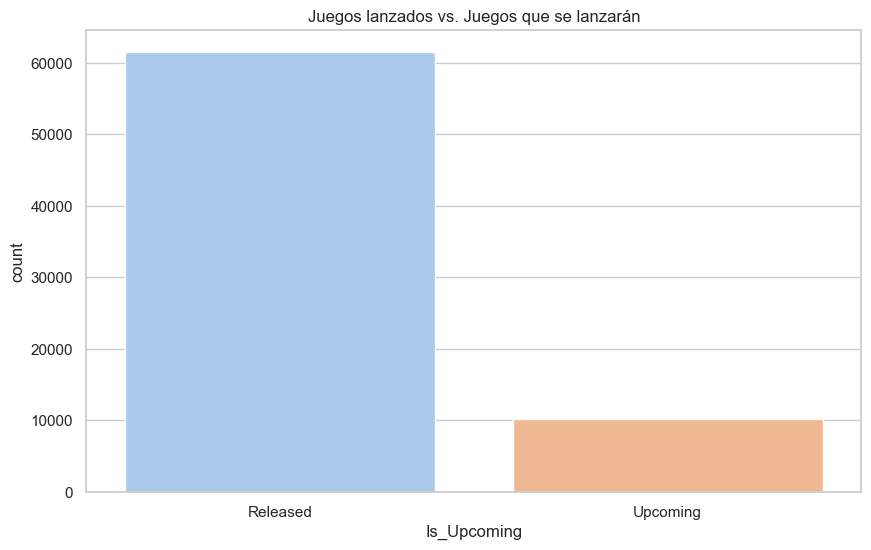

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
plot = sns.countplot(data=data, x='Is_Upcoming', palette='pastel')
plt.title('Juegos lanzados vs. Juegos que se lanzar√°n')
plt.xticks(ticks=[0,1], labels=['Released', 'Upcoming'])


plt.show()


Steam precarga el juego en la plataforma aproximadamente un a√±o antes de su lanzamiento, por lo que podemos suponer aproximadamente que el juego saldr√° a la venta en 2024.

In [15]:
data['Release Date'].fillna(2024, inplace=True)
data.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description         210
Reviews Summary        24084
Reviews_number         24084
Reviews_percentage     24084
Developer                220
Publisher                516
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4963
Memory                  4599
Graphics_Series        17983
Storage_Clean           5614
Is_Upcoming                0
dtype: int64

### Descripci√≥n
podemos a√±adir la funci√≥n de texto de descripci√≥n del juego, ya que implica el detalle del juego.

In [16]:
data['description_length'] = data['Game Description'].fillna('').apply(len)

In [17]:
data['Game Description'].fillna('Unknown', inplace=True)

In [18]:
data.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary        24084
Reviews_number         24084
Reviews_percentage     24084
Developer                220
Publisher                516
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4963
Memory                  4599
Graphics_Series        17983
Storage_Clean           5614
Is_Upcoming                0
description_length         0
dtype: int64

In [19]:
reviews_nan_data = data[data['Reviews Summary'].isna()]
print(reviews_nan_data['Release Date'].unique())
reviews_nan_data

[2016. 2021. 2022. 2015. 2000. 2007. 2023. 2020. 2017. 2012. 2018. 2009.
 2014. 2019. 2006. 2010. 2013. 2008. 2011. 1969.]


Title  Original Price  \
1317       The Witcher 3: Wild Hunt - Complete Edition           24.99   
1448   The Elder Scrolls V: Skyrim Anniversary Edition           30.99   
1583                     DARK SOULS III Deluxe Edition           64.98   
1665                    Monster Hunter Rise + Sunbreak           47.99   
2057               Fallout 4: Game of the Year Edition           29.99   
...                                                ...             ...   
71666                                          Fluxion           14.49   
71669                                          Respawn            1.99   
71672                                      Cruo Domine            0.00   
71679                  Survival & Horror: Undead Space            0.00   
71684                                   Dungeon Legend           14.49   

       Discounted Price  Price Difference  Release Date  \
1317              24.99               0.0        2016.0   
1448              30.99               0.0        2021.0   
1583              64.98               0.0        2016.0   
1665              47.99               0.0        2022.0   
2057              29.99               0.0        2015.0   
...                 ...               ...           ...   
71666             14.49               0.0        2023.0   
71669              1.99               0.0        2023.0   
71672              0.00               0.0        2023.0   
71679              0.00               0.0        2023.0   
71684             14.49               0.0        2023.0   

                                        Game Description Reviews Summary  \
1317                                             Unknown             NaN   
1448                                             Unknown             NaN   
1583                                             Unknown             NaN   
1665                                             Unknown             NaN   
2057                                             Unknown             NaN   
...                                                  ...             ...   
71666  Fluxion is a thrilling 3D action platformer wh...             NaN   
71669  "Respawn" is an independent adventure game in ...             NaN   
71672  Survive in a hostile space environment with ra...             NaN   
71679  The events take place in the future, on resear...             NaN   
71684  This is a casual breakout game. The pace of th...             NaN   

       Reviews_number  Reviews_percentage                    Developer  \
1317              NaN                 NaN                          NaN   
1448              NaN                 NaN                          NaN   
1583              NaN                 NaN                          NaN   
1665              NaN                 NaN                          NaN   
2057              NaN                 NaN                          NaN   
...               ...                 ...                          ...   
71666             NaN                 NaN           Mystic Panda Games   
71669             NaN                 NaN                         Â§ïÊú´Ê∏∏Êàè   
71672             NaN                 NaN                 Jiri Otoupal   
71679             NaN                 NaN                      PunkOFF   
71684             NaN                 NaN  Louis Winfield Game Studios   

                         Publisher            Supported Languages  \
1317                  THE WITCHER¬Æ                             []   
1448                           NaN                             []   
1583                     FRANCHISE                             []   
1665                Monster Hunter                             []   
2057                           NaN                             []   
...                            ...                            ...   
71666           Mystic Panda Games                      [English]   
71669                         Â§ïÊú´Ê∏∏Êàè  [English, Simplified Chinese]   
71672      

C:\Users\Miguel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Miguel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


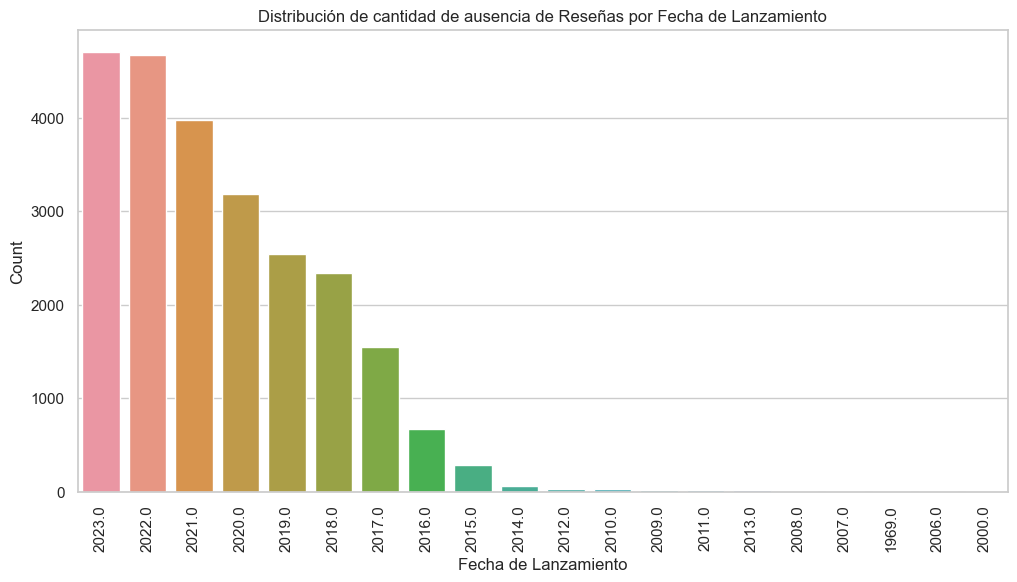

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=reviews_nan_data, x='Release Date', order=reviews_nan_data['Release Date'].value_counts().index)
plt.title('Distribuci√≥n de cantidad de ausencia de Rese√±as por Fecha de Lanzamiento')
plt.xlabel('Fecha de Lanzamiento')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

De las filas de aqu√≠ algunos juegos ya han sido lanzados en 2023 pero tienen tan pocas rese√±as o ninguna rese√±a, por lo tanto steam no proporciona ninguna informaci√≥n sobre la entrada all√≠, as√≠ que no podemos determinar sus valores. Sin embargo, prestando atenci√≥n a los t√≠tulos de los juegos nos dimos cuenta de que algunos juegos tienen muchos valores NaN, que coinciden con la palabra ¬´edici√≥n¬ª en su t√≠tulo. Esto se debe a que se trata de modos de juego que no son m√°s que extensiones de los juegos originales y no contienen ninguna informaci√≥n en su web. Sin embargo, sus descripciones deben ser compatibles con su juego base. As√≠ que si ese juego ya est√° en nuestros datos no tiene sentido a√±adir extensiones. Podemos deshacernos de ellas. 

In [21]:
data = data[~data['Title'].str.endswith('Edition')]

data.reset_index(drop=True, inplace=True)

In [22]:
data.shape

(70465, 20)

In [23]:
data.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary        23572
Reviews_number         23572
Reviews_percentage     23572
Developer                169
Publisher                484
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4843
Memory                  4468
Graphics_Series        17256
Storage_Clean           5448
Is_Upcoming                0
description_length         0
dtype: int64

In [24]:
reviews_nan_data = data[data['Reviews Summary'].isna()]
reviews_nan_data

Title  Original Price  \
1582                      Monster Hunter Rise + Sunbreak           47.99   
2257                                            Ricochet            3.29   
2581   ROMANCE OF THE THREE KINGDOMS XIV: Diplomacy a...           69.99   
2647   Mega Man Battle Network Legacy Collection (Vol...           47.99   
3077   Romance of the Three Kingdoms XIII Fame and St...           34.99   
...                                                  ...             ...   
70433                                            Fluxion           14.49   
70436                                            Respawn            1.99   
70439                                        Cruo Domine            0.00   
70446                    Survival & Horror: Undead Space            0.00   
70451                                     Dungeon Legend           14.49   

       Discounted Price  Price Difference  Release Date  \
1582              47.99               0.0        2022.0   
2257               3.29               0.0        2000.0   
2581              69.99               0.0        2020.0   
2647              47.99               0.0        2023.0   
3077              34.99               0.0        2017.0   
...                 ...               ...           ...   
70433             14.49               0.0        2023.0   
70436              1.99               0.0        2023.0   
70439              0.00               0.0        2023.0   
70446              0.00               0.0        2023.0   
70451             14.49               0.0        2023.0   

                                        Game Description Reviews Summary  \
1582                                             Unknown             NaN   
2257   Battle your friends in exciting arenas with yo...             NaN   
2581                                             Unknown             NaN   
2647                                             Unknown             NaN   
3077                                             Unknown             NaN   
...                                                  ...             ...   
70433  Fluxion is a thrilling 3D action platformer wh...             NaN   
70436  "Respawn" is an independent adventure game in ...             NaN   
70439  Survive in a hostile space environment with ra...             NaN   
70446  The events take place in the future, on resear...             NaN   
70451  This is a casual breakout game. The pace of th...             NaN   

       Reviews_number  Reviews_percentage  \
1582              NaN                 NaN   
2257              NaN                 NaN   
2581              NaN                 NaN   
2647              NaN                 NaN   
3077              NaN                 NaN   
...               ...                 ...   
70433             NaN                 NaN   
70436             NaN                 NaN   
70439             NaN                 NaN   
70446             NaN                 NaN   
70451             NaN                 NaN   

                                  Developer                    Publisher  \
1582                                    NaN               Monster Hunter   
2257   Nathaniel Stauffer, Michael Stauffer                   Nix Studio   
2581                                    NaN   KOEI TECMO GAMES CO., LTD.   
2647                                    NaN                     Mega Man   
3077                                    NaN   KOEI TECMO GAMES CO., LTD.   
...                                     ...                          ...   
70433                    Mystic Panda Games           Mystic Panda Games   
70436                                  Â§ïÊú´Ê∏∏Êàè                         Â§ïÊú´Ê∏∏Êàè   
70439                          Jiri Otoupal                 Jiri Otoupal   
70446                               PunkOFF                  Honor Games   
70451           Louis Winfield Game Studios  Louis Winfield Game Studios   

                 Supported Languages  \
1582  

Podemos ver claramente que algunas filas son tan poco informativas que no capturan nada y ser√°n basura para el modelo. 

In [25]:
unknown_mask = (data.drop(columns=['Title']) == 'Unknown')
nan_mask = data.drop(columns=['Title']).isnull()

total_mask = unknown_mask | nan_mask
unknown_or_nan_counts = total_mask.sum(axis=1)

data = data[unknown_or_nan_counts < 10]

data.reset_index(drop=True, inplace=True)

In [26]:
data.shape

(70405, 20)

In [27]:
data.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary        23512
Reviews_number         23512
Reviews_percentage     23512
Developer                109
Publisher                424
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4783
Memory                  4408
Graphics_Series        17196
Storage_Clean           5388
Is_Upcoming                0
description_length         0
dtype: int64

In [28]:
reviews_nan_data = data[data['Reviews Summary'].isna()]
reviews_nan_data

Title  Original Price  \
1582                      Monster Hunter Rise + Sunbreak           47.99   
2257                                            Ricochet            3.29   
2581   ROMANCE OF THE THREE KINGDOMS XIV: Diplomacy a...           69.99   
2647   Mega Man Battle Network Legacy Collection (Vol...           47.99   
3077   Romance of the Three Kingdoms XIII Fame and St...           34.99   
...                                                  ...             ...   
70373                                            Fluxion           14.49   
70376                                            Respawn            1.99   
70379                                        Cruo Domine            0.00   
70386                    Survival & Horror: Undead Space            0.00   
70391                                     Dungeon Legend           14.49   

       Discounted Price  Price Difference  Release Date  \
1582              47.99               0.0        2022.0   
2257               3.29               0.0        2000.0   
2581              69.99               0.0        2020.0   
2647              47.99               0.0        2023.0   
3077              34.99               0.0        2017.0   
...                 ...               ...           ...   
70373             14.49               0.0        2023.0   
70376              1.99               0.0        2023.0   
70379              0.00               0.0        2023.0   
70386              0.00               0.0        2023.0   
70391             14.49               0.0        2023.0   

                                        Game Description Reviews Summary  \
1582                                             Unknown             NaN   
2257   Battle your friends in exciting arenas with yo...             NaN   
2581                                             Unknown             NaN   
2647                                             Unknown             NaN   
3077                                             Unknown             NaN   
...                                                  ...             ...   
70373  Fluxion is a thrilling 3D action platformer wh...             NaN   
70376  "Respawn" is an independent adventure game in ...             NaN   
70379  Survive in a hostile space environment with ra...             NaN   
70386  The events take place in the future, on resear...             NaN   
70391  This is a casual breakout game. The pace of th...             NaN   

       Reviews_number  Reviews_percentage  \
1582              NaN                 NaN   
2257              NaN                 NaN   
2581              NaN                 NaN   
2647              NaN                 NaN   
3077              NaN                 NaN   
...               ...                 ...   
70373             NaN                 NaN   
70376             NaN                 NaN   
70379             NaN                 NaN   
70386             NaN                 NaN   
70391             NaN                 NaN   

                                  Developer                    Publisher  \
1582                                    NaN               Monster Hunter   
2257   Nathaniel Stauffer, Michael Stauffer                   Nix Studio   
2581                                    NaN   KOEI TECMO GAMES CO., LTD.   
2647                                    NaN                     Mega Man   
3077                                    NaN   KOEI TECMO GAMES CO., LTD.   
...                                     ...                          ...   
70373                    Mystic Panda Games           Mystic Panda Games   
70376                                  Â§ïÊú´Ê∏∏Êàè                         Â§ïÊú´Ê∏∏Êàè   
70379                          Jiri Otoupal                 Jiri Otoupal   
70386                               PunkOFF                  Honor Games   
70391           Louis Winfield Game Studios  Louis Winfield Game Studios   

                 Supported Languages  \
1582  

otros juegos no son tan conocidos y, por tanto, casi no tienen rese√±as. As√≠ que podemos llamar a estos casos desconocidos en resumen y 0 en las columnas de n√∫meros y porcentajes

In [29]:
data['Reviews Summary'].fillna('Unknown', inplace=True)
data['Reviews_number'].fillna(0, inplace=True)
data['Reviews_percentage'].fillna(0, inplace=True)
data.isna().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary            0
Reviews_number             0
Reviews_percentage         0
Developer                109
Publisher                424
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4783
Memory                  4408
Graphics_Series        17196
Storage_Clean           5388
Is_Upcoming                0
description_length         0
dtype: int64

Los valores textuales NaN pueden sustituirse por ¬´Desconocido¬ª, pero en el caso de los valores num√©ricos ser√° necesario un enfoque diferente. 

In [30]:
cols_textual = ['Developer', 'Publisher', 'Supported Languages', 'Popular Tags', 'Game Features']
for col in cols_textual:
    data[col].fillna('Unknown', inplace=True)

cols_hardware = ['Processor', 'Graphics_Series']
for col in cols_hardware:
    data[col].fillna('Unknown', inplace=True)   
data.isna().sum()

Title                     0
Original Price            0
Discounted Price          0
Price Difference          0
Release Date              0
Game Description          0
Reviews Summary           0
Reviews_number            0
Reviews_percentage        0
Developer                 0
Publisher                 0
Supported Languages       0
Popular Tags              0
Game Features             0
Processor                 0
Memory                 4408
Graphics_Series           0
Storage_Clean          5388
Is_Upcoming               0
description_length        0
dtype: int64

In [31]:
def convert_to_gb(value):

    if not isinstance(value, str):
        return value
    
    if 'GB' in value:
        return float(value.replace('GB', '').strip())
    elif 'MB' in value:
        return float(value.replace('MB', '').strip()) / 1000
    elif value == 'Unknown':
        return None
    else:
        return value

data['Storage_Clean'] = data['Storage_Clean'].apply(convert_to_gb)


Defina una funci√≥n impute_based_on_columns que impute los valores que faltan en una columna de destino bas√°ndose en los valores de otras dos columnas especificadas. Identifica las filas con valores perdidos, encuentra filas similares basadas en las columnas especificadas y rellena los valores perdidos con el valor m√°s frecuente de esas filas similares. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

def impute_based_on_columns(data, target_col, based_on_cols):
    for index, row in data[data[target_col].isnull()].iterrows():
        
        similar_rows = data[(data[based_on_cols[0]] == row[based_on_cols[0]]) & 
                            (data[based_on_cols[1]] == row[based_on_cols[1]])]
        
        most_frequent_value = similar_rows[target_col].mode()
        
        if not most_frequent_value.empty:  
            data.at[index, target_col] = most_frequent_value.iloc[0]
            
    return data


data = impute_based_on_columns(data, 'Memory', ['Graphics_Series', 'Processor'])
data = impute_based_on_columns(data, 'Storage_Clean', ['Graphics_Series', 'Processor'])

In [33]:
data.isnull().sum()

Title                     0
Original Price            0
Discounted Price          0
Price Difference          0
Release Date              0
Game Description          0
Reviews Summary           0
Reviews_number            0
Reviews_percentage        0
Developer                 0
Publisher                 0
Supported Languages       0
Popular Tags              0
Game Features             0
Processor                 0
Memory                  535
Graphics_Series           0
Storage_Clean          1055
Is_Upcoming               0
description_length        0
dtype: int64

Todav√≠a quedan algunos nulos en los datos, as√≠ que podemos sustituirlos por modas

In [34]:
data['Memory'].fillna(data['Memory'].mode().iloc[0], inplace=True)
data['Storage_Clean'].fillna(data['Storage_Clean'].mode().iloc[0], inplace=True)
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
70400                          Sunkenland            0.00              0.00   
70401                           The Front            0.00              0.00   
70402                        The Bornless            0.00              0.00   
70403                     Winter Memories            0.00              0.00   
70404  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
70400              0.00        2024.0   
70401              0.00        2024.0   
70402              0.00        2024.0   
70403              0.00        2024.0   
70404              0.00        2024.0   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
70400  Get ready for a Waterworld-themed survival gam...   
70401  The Front is a survival-open-world-crafting (S...   
70402  Welcome to The Bornless, an action horror FPS....   
70403  After the unforgettable summer memories you‚Äôve...   
70404  In the direct sequel to the record-breaking Ca...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
70400                  Unknown             0.0                 0.0   
70401                  Unknown             0.0                 0.0   
70402                  Unknown             0.0                 0.0   
70403                  Unknown             0.0                 0.0   
70404                  Unknown             0.0                 0.0   

                                               Developer          Publisher  \
0                                         Larian Studios     Larian Studios   
1                       Valve, Hidden Path Entertainment              Valve   
2                                  Respawn Entertainment    Electronic Arts   
3                                       Playground Games  Xbox Game Studios   
4      Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   
...                                                  ...                ...   
70400                                     Vector3 Studio     Vector3 Studio   
70401                                       Samar Studio       Samar Studio   
70402                                  Cathedral Studios  Cathedral Studios   
70403                                        Dojin Otome       Kagura Games   
70404  Sledgehammer Games, Treyarch, Infinity Ward, B...         Activision   

                                     Supported Languages  \
0      [Engli

In [35]:
data.isnull().sum()

Title                  0
Original Price         0
Discounted Price       0
Price Difference       0
Release Date           0
Game Description       0
Reviews Summary        0
Reviews_number         0
Reviews_percentage     0
Developer              0
Publisher              0
Supported Languages    0
Popular Tags           0
Game Features          0
Processor              0
Memory                 0
Graphics_Series        0
Storage_Clean          0
Is_Upcoming            0
description_length     0
dtype: int64

In [36]:
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
70400                          Sunkenland            0.00              0.00   
70401                           The Front            0.00              0.00   
70402                        The Bornless            0.00              0.00   
70403                     Winter Memories            0.00              0.00   
70404  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
70400              0.00        2024.0   
70401              0.00        2024.0   
70402              0.00        2024.0   
70403              0.00        2024.0   
70404              0.00        2024.0   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
70400  Get ready for a Waterworld-themed survival gam...   
70401  The Front is a survival-open-world-crafting (S...   
70402  Welcome to The Bornless, an action horror FPS....   
70403  After the unforgettable summer memories you‚Äôve...   
70404  In the direct sequel to the record-breaking Ca...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
70400                  Unknown             0.0                 0.0   
70401                  Unknown             0.0                 0.0   
70402                  Unknown             0.0                 0.0   
70403                  Unknown             0.0                 0.0   
70404                  Unknown             0.0                 0.0   

                                               Developer          Publisher  \
0                                         Larian Studios     Larian Studios   
1                       Valve, Hidden Path Entertainment              Valve   
2                                  Respawn Entertainment    Electronic Arts   
3                                       Playground Games  Xbox Game Studios   
4      Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   
...                                                  ...                ...   
70400                                     Vector3 Studio     Vector3 Studio   
70401                                       Samar Studio       Samar Studio   
70402                                  Cathedral Studios  Cathedral Studios   
70403                                        Dojin Otome       Kagura Games   
70404  Sledgehammer Games, Treyarch, Infinity Ward, B...         Activision   

                                     Supported Languages  \
0      [Engli

In [37]:
data['Storage_Clean'].unique()

array([150.   ,  15.   ,  56.   , ...,   0.644,   1.345,   0.404])

In [38]:
from scipy.stats import zscore

In [39]:
def handle_outliers_using_zscore(data, column_name, threshold=2.5):
    data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
    
    if data[column_name].isnull().all(): 
        return data
    
    z_scores = zscore(data[column_name].dropna())
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > threshold)
    
    mean_val = data[column_name].mean()
    std_val = data[column_name].std()
    
    upper_bound = mean_val + threshold * std_val
    lower_bound = mean_val - threshold * std_val
    
    data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])
    data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])
    
    return data

numeric_columns = ["Original Price", "Discounted Price", "Price Difference", "Memory", "Storage_Clean"]

for column in numeric_columns:
    data = handle_outliers_using_zscore(data, column)

In [40]:
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
70400                          Sunkenland            0.00              0.00   
70401                           The Front            0.00              0.00   
70402                        The Bornless            0.00              0.00   
70403                     Winter Memories            0.00              0.00   
70404  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
70400              0.00        2024.0   
70401              0.00        2024.0   
70402              0.00        2024.0   
70403              0.00        2024.0   
70404              0.00        2024.0   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
70400  Get ready for a Waterworld-themed survival gam...   
70401  The Front is a survival-open-world-crafting (S...   
70402  Welcome to The Bornless, an action horror FPS....   
70403  After the unforgettable summer memories you‚Äôve...   
70404  In the direct sequel to the record-breaking Ca...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
70400                  Unknown             0.0                 0.0   
70401                  Unknown             0.0                 0.0   
70402                  Unknown             0.0                 0.0   
70403                  Unknown             0.0                 0.0   
70404                  Unknown             0.0                 0.0   

                                               Developer          Publisher  \
0                                         Larian Studios     Larian Studios   
1                       Valve, Hidden Path Entertainment              Valve   
2                                  Respawn Entertainment    Electronic Arts   
3                                       Playground Games  Xbox Game Studios   
4      Infinity Ward, Raven Software, Beenox, Treyarc...         Activision   
...                                                  ...                ...   
70400                                     Vector3 Studio     Vector3 Studio   
70401                                       Samar Studio       Samar Studio   
70402                                  Cathedral Studios  Cathedral Studios   
70403                                        Dojin Otome       Kagura Games   
70404  Sledgehammer Games, Treyarch, Infinity Ward, B...         Activision   

                                     Supported Languages  \
0      [Engli

## Correlation

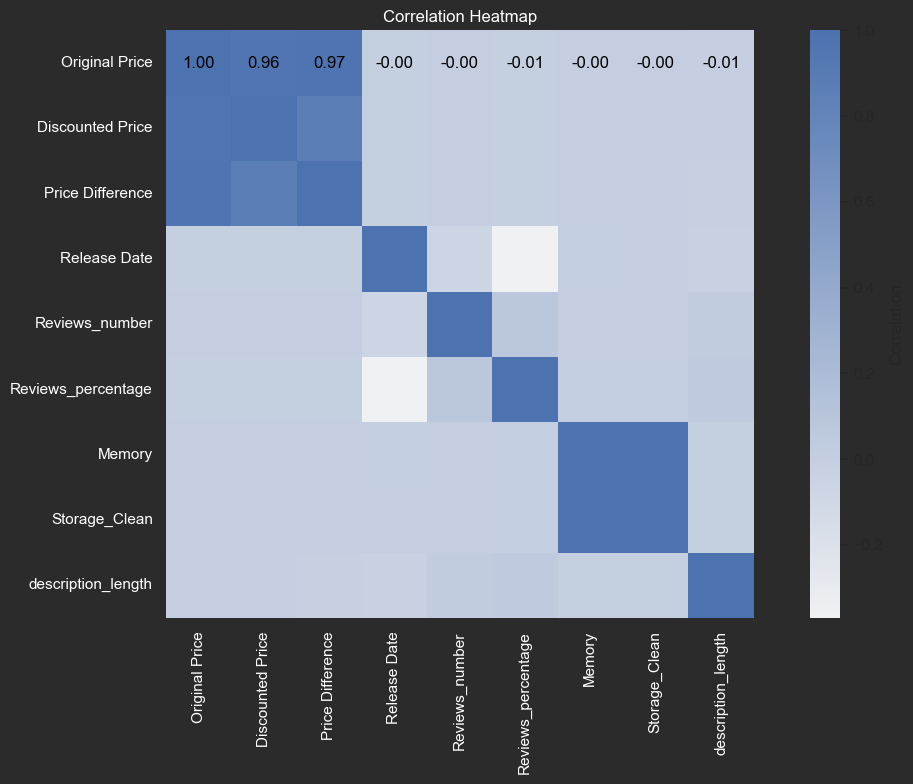

In [41]:
numerical_columns = []

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  
        numerical_columns.append(column)

plt.figure(figsize=(12, 8))

cmap = sns.color_palette("light:b", as_cmap=True)

sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f", square=True, cmap=cmap, cbar_kws={"label": "Correlation"}, annot_kws={"color": "black"})

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')
plt.title('Correlation Heatmap', color='white')
plt.xlabel('', color='white')
plt.ylabel('', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

* El mapa de correlaci√≥n muestra que los tres indicadores de precios est√°n interrelacionados, lo cual no es sorprendente.
* Otras caracter√≠sticas tienen poca relaci√≥n, salvo Is_Upcoming y Release Date. Su correlaci√≥n positiva no es inesperada, ya que cuanto m√°s tarde sea la fecha de lanzamiento, m√°s probable es que la fila sea positiva en Is_Upcoming.
* Podemos observar una relaci√≥n negativa entre Reviews_number & Reviews_percentage con respecto a Release Date. Esto podr√≠a deberse al hecho de que, una vez lanzado el juego, a√∫n no ha recibido muchas cr√≠ticas o incluso no ha recibido ninguna si la fila indica ¬´upcoming game¬ª.
* El porcentaje y el n√∫mero de cr√≠ticas tienen una correlaci√≥n positiva de 0,29, lo que tampoco es sorprendente: si el juego tiene muchas cr√≠ticas, es m√°s probable que mucha gente lo vea y, en ese caso, el juego deber√≠a tener caracter√≠sticas positivas.


In [42]:
top_10_games_by_reviews = data.sort_values(by='Reviews_number', ascending=False).head(10)
top_10_games_by_reviews[['Title', 'Reviews_number']]

Title  Reviews_number
108                                         Arma 3        154266.0
139                                   Overwatch¬Æ 2        146650.0
9                               NARAKA: BLADEPOINT        146529.0
0                                  Baldur's Gate 3        128900.0
219                                Space Engineers         78077.0
1                 Counter-Strike: Global Offensive         75284.0
1014                              This War of Mine         61669.0
1219  The Witcher: Enhanced Edition Director's Cut         59283.0
10                              Grand Theft Auto V         22946.0
14                                          Dota 2         20072.0

Aqu√≠ podemos ver qu√© juegos han recibido m√°s cr√≠ticas, pero hay que tener en cuenta que s√≥lo tenemos en cuenta las cr√≠ticas recientes, ya que nos interesan las tendencias. Es decir, que el panorama general podr√≠a variar.

In [43]:
data['Developer'] = data['Developer'].str.lower().str.strip()
data['Publisher'] = data['Publisher'].str.lower().str.strip()
data['Supported Languages'] = data['Supported Languages'].str.lower().str.strip()
data['Popular Tags'] = data['Popular Tags'].str.lower().str.strip()
data['Game Features'] = data['Game Features'].str.lower().str.strip()


In [44]:
def get_unique_from_comma_separated(column_data):
    flattened_list = [item.strip() for sublist in column_data.dropna().str.split(',').tolist() for item in sublist]
    return set(flattened_list)

columns_to_check = ['Developer', 'Publisher', 'Supported Languages', 'Popular Tags', 'Game Features']

for col in columns_to_check:
    unique_values = get_unique_from_comma_separated(data[col])
    print(f"------ {col} ------")
    print(f"Number of unique values: {len(unique_values)}")
    print("Sample values:")
    print(list(unique_values)[:10]) 
    print("\n")

------ Developer ------
Number of unique values: 47314
Sample values:
['', 'fox dive studio', 'stone pixel games', 'akehabara', 'axeax', 'anushay qureshi', 'astro chimp', 'henry gagnon', 'studio kraze', 'faxdoc and nostalgiatree games']


------ Publisher ------
Number of unique values: 38180
Sample values:
['', 'fox dive studio', 'stone pixel games', 'akehabara', 'axeax', 'astro chimp', 'henry gagnon', 'studio kraze', 'faxdoc and nostalgiatree games', 'makopaz']


------ Supported Languages ------
Number of unique values: 183
Sample values:
['tigrinya', 'mongolian', 'galician', 'german]', 'albanian]', 'estonian]', 'serbian]', 'afrikaans]', 'hebrew', 'kinyarwanda']


------ Popular Tags ------
Number of unique values: 1303
Sample values:
['action rts', 'quick-time events]', '[trading card game', 'cartoon]', 'immersive sim]', '[animation & modeling', '[music-based procedural generation', '[3d', '["shoot em up"', 'demons']


------ Game Features ------
Number of unique values: 106
Sample

A partir de la informaci√≥n anterior podemos hacernos una idea general de cu√°ntos desarrolladores hay, cu√°ntos idiomas var√≠an entre los juegos y cu√°les son sus caracter√≠sticas. El n√∫mero de estas caracter√≠sticas es lo suficientemente razonable como para concluir que los datos describen la realidad, al menos en cierta medida. Podemos ver que las caracter√≠sticas del juego, que son etiquetas emitidas por el propio Steam, son menores en n√∫mero y ofrecen una visi√≥n m√°s profesional de c√≥mo el √©xito del juego se explica por las etiquetas emitidas. Sin embargo, las etiquetas Populares son mucho m√°s numerosas, ya que son las etiquetas que los jugadores etiquetan al juego, lo que puede contener informaci√≥n que no es general.

In [45]:
def convert_to_list(column_data):
    return column_data.dropna().str.split(',').apply(lambda x: [item.strip() for item in x])

columns_to_convert = ['Supported Languages', 'Popular Tags', 'Game Features']

for col in columns_to_convert:
    data[col] = convert_to_list(data[col])
data[columns_to_convert].head()

Supported Languages  \
0  [[english, french, german, spanish - spain, po...   
1  [[english, czech, danish, dutch, finnish, fren...   
2  [[english, french, italian, german, spanish - ...   
3  [[english, french, italian, german, spanish - ...   
4  [[english, french, italian, german, spanish - ...   

                                        Popular Tags  \
0  [[rpg, choices matter, character customization...   
1  [[fps, shooter, multiplayer, competitive, acti...   
2  [[free to play, multiplayer, battle royale, sh...   
3  [[racing, open world, driving, multiplayer, au...   
4  [[fps, multiplayer, shooter, action, singlepla...   

                                       Game Features  
0  [[single-player, online co-op, lan co-op, stea...  
1  [[steam achievements, full controller support,...  
2  [[online pvp, online co-op, steam achievements...  
3  [[single-player, online pvp, online co-op, cro...  
4  [[single-player, online pvp, online co-op, cro...

In [46]:
top_100_games = data.nlargest(100, 'Reviews_number')
top_developers = top_100_games['Developer'].unique()
top_developers_df = pd.DataFrame({'Top Developers': top_developers})
top_developers_df

Top Developers
0            bohemia interactive
1   blizzard entertainment, inc.
2               24 entertainment
3                 larian studios
4            keen software house
..                           ...
86                   fancy games
87                cosmic cow llc
88            blue mammoth games
89           zero point software
90      last bastion studios llc

[91 rows x 1 columns]

Podemos ver que en el top 100 de juegos aparecen 91 desarrolladores. Esto significa que hay algunos desarrolladores que tienen m√°s de 1 juegos en el top 100 de juegos m√°s revisados. Veamos cu√°les son.

In [47]:
developers_counts = top_100_games['Developer'].value_counts()
developers_multiple_games = developers_counts[developers_counts > 1]
developers_multiple_games_df = pd.DataFrame({'Developer': developers_multiple_games.index, 'Number of Games': developers_multiple_games.values})
developers_multiple_games_df

Developer  Number of Games
0       cd projekt red                4
1                valve                4
2       larian studios                2
3  keen software house                2
4    facepunch studios                2

In [48]:
top_developers_with_games = {}

for developer in developers_multiple_games.index:
    games_from_developer = top_100_games[top_100_games['Developer'] == developer]['Title'].tolist()
    top_developers_with_games[developer] = games_from_developer

top_developers_df = pd.DataFrame(list(top_developers_with_games.items()), columns=['Developer', 'Games'])
top_developers_df

Developer                                              Games
0       cd projekt red  [The Witcher: Enhanced Edition Director's Cut,...
1                valve  [Dota 2, Team Fortress 2, Left 4 Dead 2, Porta...
2       larian studios  [Baldur's Gate 3, Divinity: Original Sin (Clas...
3  keen software house              [Space Engineers, Medieval Engineers]
4    facepunch studios                                [Garry's Mod, Rust]

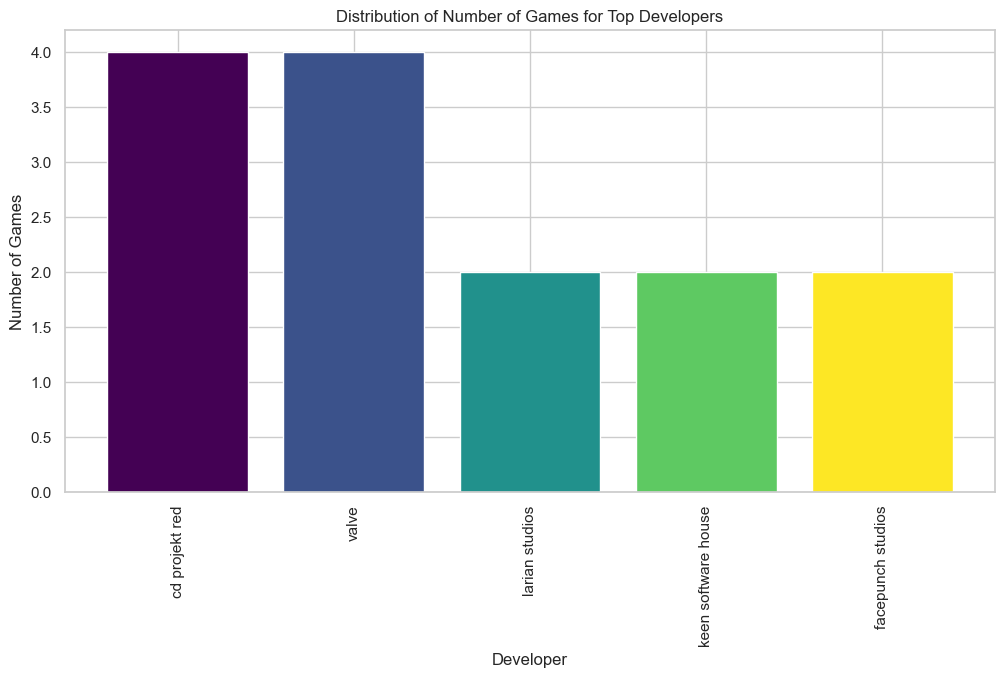

In [49]:
games_count_df = top_developers_df.copy()
games_count_df['Number of Games'] = games_count_df['Games'].apply(len)

colors = plt.cm.viridis(np.linspace(0, 1, len(games_count_df)))

plt.figure(figsize=(12, 6))
plt.bar(games_count_df['Developer'], games_count_df['Number of Games'], color=colors)
plt.title('Distribution of Number of Games for Top Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

Estos juegos son aplicaciones muy conocidas, por lo que no es de extra√±ar que aparezcan aqu√≠.
Ahora podemos obtener la misma informaci√≥n para los desarrolladores que menos han aparecido. No ser√° una informaci√≥n valiosa, pero es bueno saber cu√°les han tenido menos √©xito seg√∫n las √∫ltimas cr√≠ticas.

In [51]:
bottom_100_games = data.nsmallest(100, 'Reviews_number')

least_known_developers = bottom_100_games['Developer'].unique()

developers_count = bottom_100_games['Developer'].value_counts()
developers_multiple_games = developers_count[developers_count > 1]

least_known_developers_with_games = {}

for developer in developers_multiple_games.index:
    games_from_developer = bottom_100_games[bottom_100_games['Developer'] == developer]['Title'].tolist()
    least_known_developers_with_games[developer] = games_from_developer

least_known_developers_df = pd.DataFrame(list(least_known_developers_with_games.items()), columns=['Developer', 'Games'])
least_known_developers_df

Developer                                              Games
0   unknown  [Monster Hunter Rise + Sunbreak, ROMANCE OF TH...

#### Sin embargo, estas cifras no significan necesariamente que se trate de los juegos con m√°s o menos √©xito. Simplemente fueron los m√°s o los menos populares, el √©xito se capta mejor por el porcentaje de cr√≠ticas positivas de las filas.

In [53]:
top_100_games_percentage = data.nlargest(100, 'Reviews_percentage')

top_developers_percentage = top_100_games_percentage['Developer'].unique()

developers_count_percentage = top_100_games_percentage['Developer'].value_counts()
developers_multiple_games_percentage = developers_count_percentage[developers_count_percentage > 1]

top_developers_with_games_percentage = {}

for developer in developers_multiple_games_percentage.index:
    games_from_developer = top_100_games_percentage[top_100_games_percentage['Developer'] == developer]['Title'].tolist()
    top_developers_with_games_percentage[developer] = games_from_developer

top_developers_df_percentage = pd.DataFrame(list(top_developers_with_games_percentage.items()), columns=['Developer', 'Games'])
top_developers_df_percentage

Developer  \
0                  neko works   
1                nihon falcom   
2           kairosoft co.,ltd   
3         jackbox games, inc.   
4                 anchor inc.   
5       sprite, nekonyan ltd.   
6                   lucasarts   
7             digital eclipse   
8  koei tecmo games co., ltd.   
9        tomorrow corporation   

                                               Games  
0  [NEKOPARA Vol. 4, NEKOPARA Vol. 2, NEKOPARA Ex...  
1  [The Legend of Heroes: Trails of Cold Steel, T...  
2                [Dungeon Village 2, Game Dev Story]  
3  [The Jackbox Party Pack 7, The Jackbox Party P...  
4  [Muv-Luv Alternative („Éû„Éñ„É©„É¥ „Ç™„É´„Çø„Éç„Ç§„ÉÜ„Ç£„É¥), Muv-Luv ...  
5  [Aokana - Four Rhythms Across the Blue - EXTRA...  
6  [STAR WARS‚Ñ¢ Episode I Racer, Monkey Island‚Ñ¢ 2 ...  
7  [Teenage Mutant Ninja Turtles: The Cowabunga C...  
8              [SAMURAI WARRIORS 5, BLUE REFLECTION]  
9           [Little Inferno, Human Resource Machine]

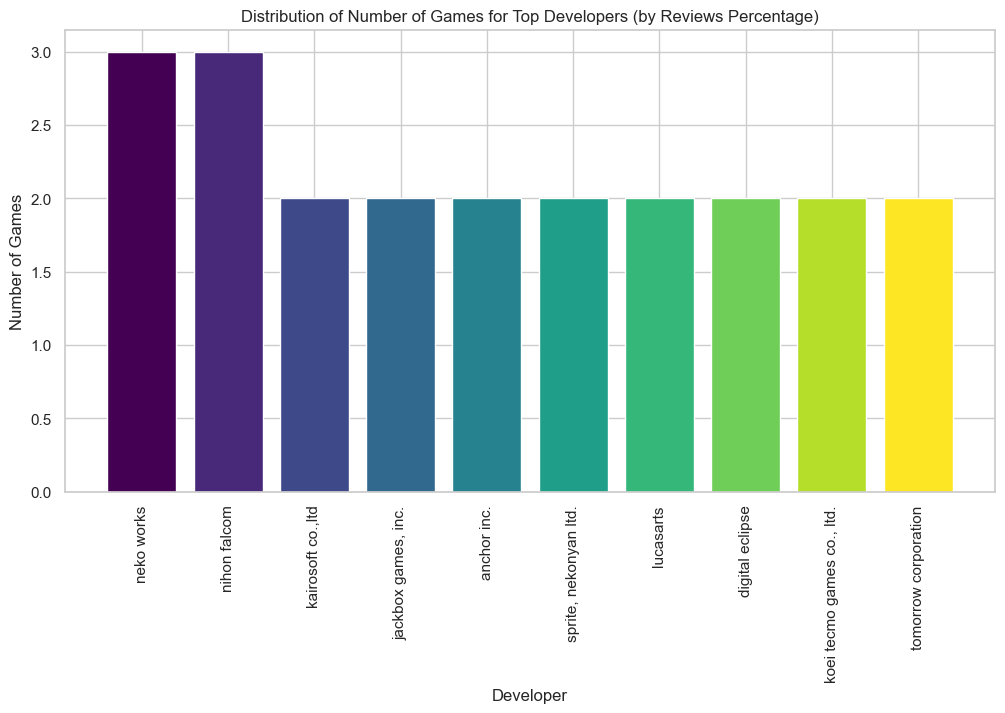

In [54]:
games_count_df_percentage = top_developers_df_percentage.copy()
games_count_df_percentage['Number of Games'] = games_count_df_percentage['Games'].apply(len)

colors_percentage = plt.cm.viridis(np.linspace(0, 1, len(games_count_df_percentage)))

plt.figure(figsize=(12, 6))
plt.bar(games_count_df_percentage['Developer'], games_count_df_percentage['Number of Games'], color=colors_percentage)
plt.title('Distribution of Number of Games for Top Developers (by Reviews Percentage)')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

Estos desarrolladores son claramente diferentes, pero veamos si hay alguno que haya aparecido en el top100 de ambos criterios.

In [56]:
top_100_games_reviews = data.nlargest(100, 'Reviews_number')
top_developers_reviews = set(top_100_games_reviews['Developer'].unique())

top_100_games_percentage = data.nlargest(100, 'Reviews_percentage')
top_developers_percentage = set(top_100_games_percentage['Developer'].unique())

common_developers = top_developers_reviews.intersection(top_developers_percentage)

common_developers_df = pd.DataFrame({'Common Developers': list(common_developers)})
common_developers_df

Empty DataFrame
Columns: [Common Developers]
Index: []

Es sorprendente ver c√≥mo no hay valores que se solapen. Esto presiona la idea de que estas caracter√≠sticas dan diferentes direcciones que deben ser bien captado

In [57]:
def get_top_game(data, column):
    return (data.sort_values(by=column, ascending=False)
            .groupby('Developer')
            .first()
            .reset_index()[['Developer', 'Title', column]])

top_by_number = get_top_game(data, 'Reviews_number')
top_by_percentage = get_top_game(data, 'Reviews_percentage')

merged_results = top_by_number.merge(top_by_percentage, on='Developer', suffixes=('_by_number', '_by_percentage'))
merged_results

Developer                          Title_by_number  \
0      !cyberapex (skagogames)                                  Assau!t   
1                      "nieko"                       Crystal Raiders VR   
2              "revday studio"                                 Solo Fox   
3                          #12                               Aura Shift   
4           #lol entertainment                               THE HUNTED   
...                        ...                                      ...   
44810           Ôºàhong kongÔºâgkd                             Soul Dossier   
44811  ùï≤ùñóùñÜùñìùñâùï∏ùñéùñìùñé ùïæùñôùñöùñâùñéùñîùñò (·ö¥·õò·õã)             Great Battles of Carolus XII   
44812                     ùôÖùòºùôÑùôá                        FLAT FORM FIGHTER   
44813                       üëÅÔ∏è                    Our Elusive Suffering   
44814    üìöÁìúÂ±±‰π¶Âùäguashan bookshop  È£ûË∑ÉË∑≥Âè∞ÔºöÂÜíÈô©ÔºÅÔºÅÔºÅ / 1000 Stages : Adventure!!!   

       Reviews_number                      Title_by_percentage  \
0                 0.0                                  Assau!t   
1                18.0                       Crystal Raiders VR   
2                14.0                                 Solo Fox   
3                 0.0                               Aura Shift   
4                 0.0                               THE HUNTED   
...               ...                                      ...   
44810           334.0                             Soul Dossier   
44811             0.0             Great Battles of Carolus XII   
44812             0.0                        FLAT FORM FIGHTER   
44813            72.0                    Our Elusive Suffering   
44814             0.0  È£ûË∑ÉË∑≥Âè∞ÔºöÂÜíÈô©ÔºÅÔºÅÔºÅ / 1000 Stages : Adventure!!!   

       Reviews_percentage  
0                     0.0  
1                    72.0  
2                    92.0  
3                     0.0  
4                     0.0  
...                   ...  
44810                86.0  
44811                 0.0  
44812                 0.0  
44813                66.0  
44814                 0.0  

[44815 rows x 5 columns]

Devuelve un DataFrame de los mejores juegos para cada desarrollador en funci√≥n de la columna dada

### Create table showing average explanator for every column for every unique Developer

In [54]:
cols_to_average = ['Original Price', 'Discounted Price', 'Reviews_number']
average_df = data.groupby('Developer')[cols_to_average].mean()
average_df

Original Price  Discounted Price  Reviews_number
Developer                                                                
!cyberapex (skagogames)           2.235             1.465             0.0
"nieko"                           8.490             8.490            18.0
"revday studio"                   2.190             2.190            14.0
#12                               0.900             0.900             0.0
#lol entertainment                0.000             0.000             0.0
...                                 ...               ...             ...
Ôºàhong kongÔºâgkd                    0.000             0.000           334.0
ùï≤ùñóùñÜùñìùñâùï∏ùñéùñìùñé ùïæùñôùñöùñâùñéùñîùñò (·ö¥·õò·õã)           3.990             3.990             0.0
ùôÖùòºùôÑùôá                              0.000             0.000             0.0
üëÅÔ∏è                                0.000             0.000            72.0
üìöÁìúÂ±±‰π¶Âùäguashan bookshop            68.990            68.990             0.0

[44816 rows x 3 columns]

In [55]:
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
70337                          Sunkenland            0.00              0.00   
70338                           The Front            0.00              0.00   
70339                        The Bornless            0.00              0.00   
70340                     Winter Memories            0.00              0.00   
70341  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
70337              0.00        2024.0   
70338              0.00        2024.0   
70339              0.00        2024.0   
70340              0.00        2024.0   
70341              0.00        2024.0   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
70337  Get ready for a Waterworld-themed survival gam...   
70338  The Front is a survival-open-world-crafting (S...   
70339  Welcome to The Bornless, an action horror FPS....   
70340  After the unforgettable summer memories you‚Äôve...   
70341  In the direct sequel to the record-breaking Ca...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
70337                  Unknown             0.0                 0.0   
70338                  Unknown             0.0                 0.0   
70339                  Unknown             0.0                 0.0   
70340                  Unknown             0.0                 0.0   
70341                  Unknown             0.0                 0.0   

                                               Developer          Publisher  \
0                                         larian studios     larian studios   
1                       valve, hidden path entertainment              valve   
2                                  respawn entertainment    electronic arts   
3                                       playground games  xbox game studios   
4      infinity ward, raven software, beenox, treyarc...         activision   
...                                                  ...                ...   
70337                                     vector3 studio     vector3 studio   
70338                                       samar studio       samar studio   
70339                                  cathedral studios  cathedral studios   
70340                                        dojin otome       kagura games   
70341  sledgehammer games, treyarch, infinity ward, b...         activision   

                                     Supported Languages  \
0      [engli

lets see how many games drop in the indicated ranges of reviews

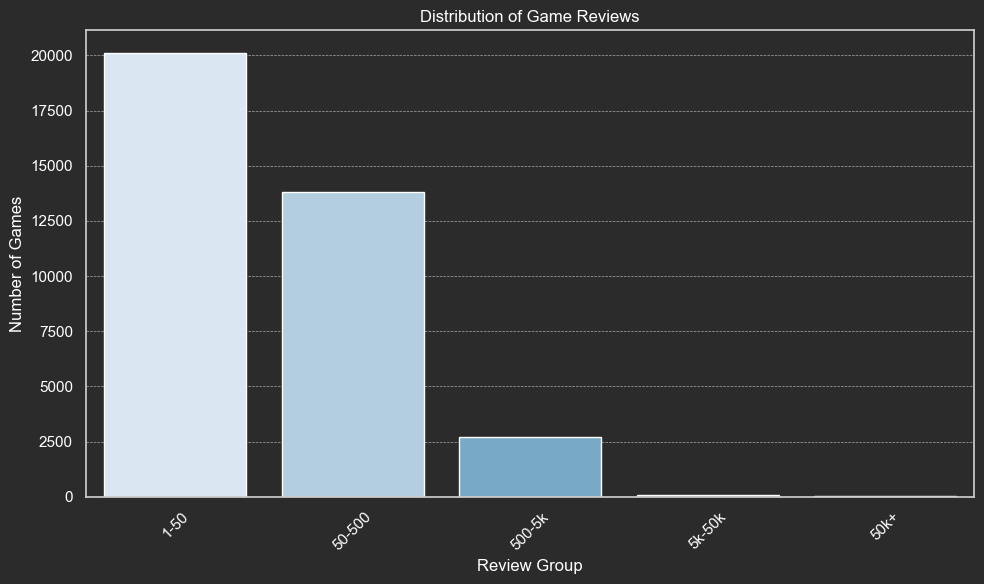

In [56]:
bin_edges = [0, 50, 500, 5000, 50000, float('inf')]
bin_labels = ['1-50', '50-500', '500-5k', '5k-50k', '50k+']

filtered_data = data[~data['Reviews_number'].isna()]

filtered_data['Review_Group'] = pd.cut(filtered_data['Reviews_number'], bins=bin_edges, labels=bin_labels)

review_count = filtered_data['Review_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=review_count.index, y=review_count.values, palette='Blues')

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Group', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Reviews', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

Since this way we cannot see numbers of last two bins we can plot the same graph for logarithmic values which will maintain the main mathematial features about the distribution and make the graph more visually appealing

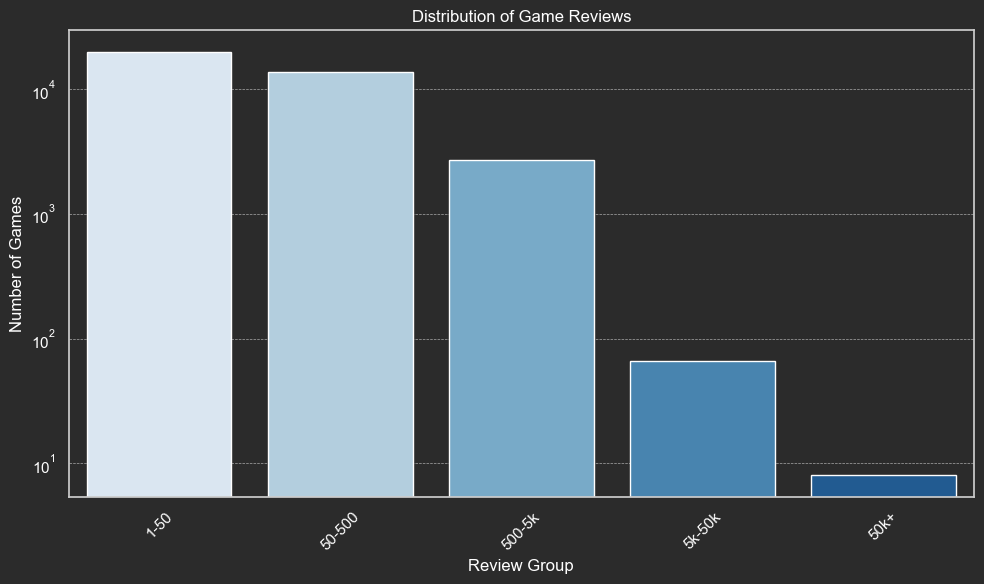

In [57]:
bin_edges = [0, 50, 500, 5000, 50000, float('inf')]
bin_labels = ['1-50', '50-500', '500-5k', '5k-50k', '50k+']

filtered_data = data[~data['Reviews_number'].isna()]

filtered_data['Review_Group'] = pd.cut(filtered_data['Reviews_number'], bins=bin_edges, labels=bin_labels)

review_count = filtered_data['Review_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=review_count.index, y=review_count.values, palette='Blues')

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Group', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Reviews', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.yscale('log')

plt.tight_layout()
plt.show()

Let us now capture the same insights about the percentages 

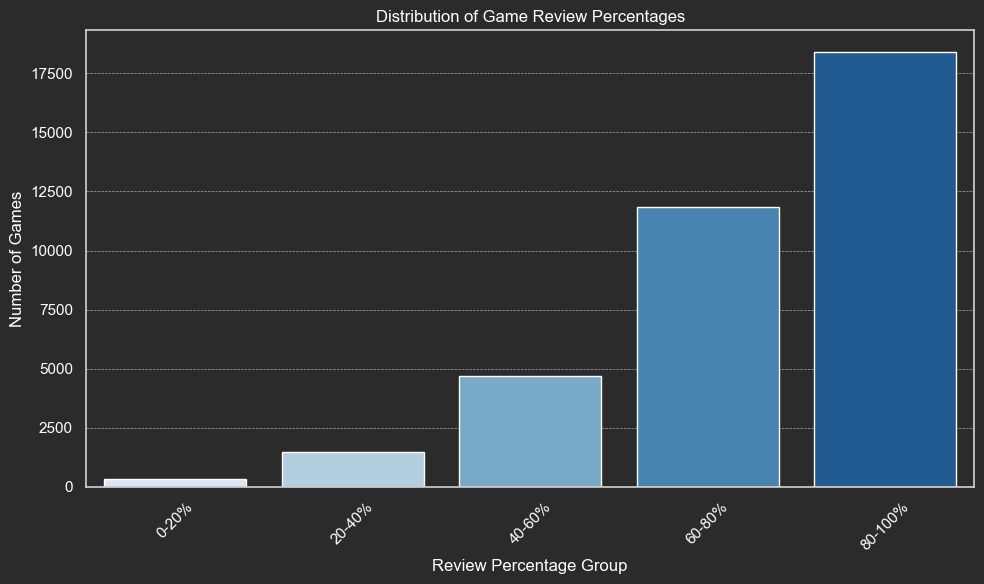

In [58]:
bin_edges = [0, 20, 40, 60, 80, 100]  
bin_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

filtered_data = data[~data['Reviews_percentage'].isna()]

filtered_data['Review_Percentage_Group'] = pd.cut(filtered_data['Reviews_percentage'], bins=bin_edges, labels=bin_labels)

review_percentage_count = filtered_data['Review_Percentage_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=review_percentage_count.index, y=review_percentage_count.values, palette='Blues')

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Percentage Group', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Review Percentages', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

This is very drastic difference. However, we can see that distribution here is inverse of the case about the number of reviews. This may be due to the fact that users only bother to give good feedback to the game unless they are really frustrated. This will not describe every case but it is factual that in number more games have positive ratings. One more supporting fact may be the occurance that those games which have too few reviews the percentage cannot be determined as is skipped to give category. 

We can now construct the same type of graph for categories of summaries.

In [59]:
print(data['Reviews Summary'].unique())

['Overwhelmingly Positive' 'Very Positive' 'Mixed' 'Mostly Positive'

 'Unknown' 'Mostly Negative' 'Overwhelmingly Negative' 'Positive'

 'Very Negative' 'Negative']


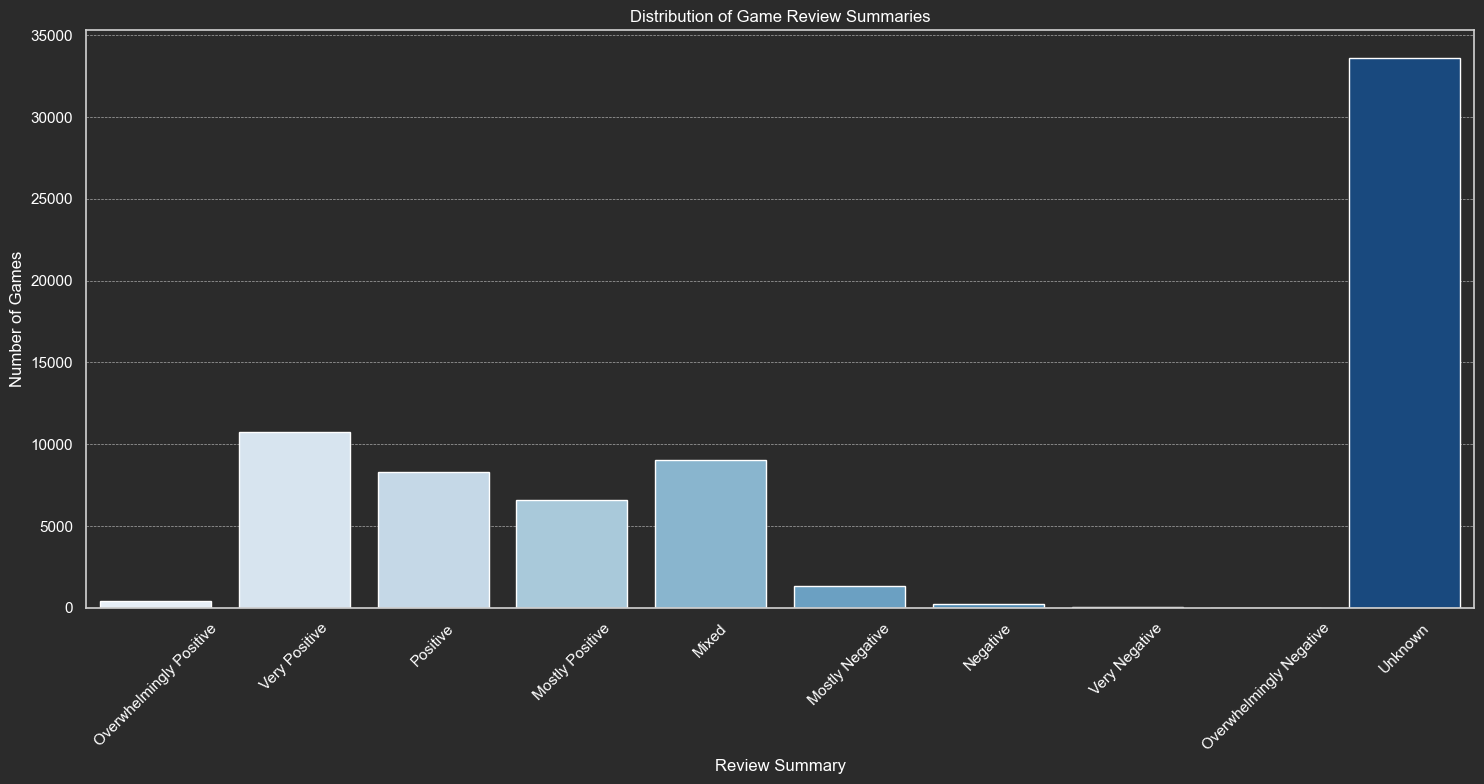

In [60]:
review_summary_count = data['Reviews Summary'].value_counts()

order = ['Overwhelmingly Positive', 'Very Positive', 'Positive', 'Mostly Positive', 'Mixed',
         'Mostly Negative', 'Negative', 'Very Negative', 'Overwhelmingly Negative', 'Unknown']

plt.figure(figsize=(15, 8))
sns.barplot(x=review_summary_count.index, y=review_summary_count.values, palette='Blues', order=order)

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Summary', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Review Summaries', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

Now the distribution of values which describe the positiveness of the game are pretty realistic, however we have a lot of Unknown values which could not have been filled since as we already saw a lot of games had close to zero reviews which does not allow us to evaluate or summarize

In [61]:
data.head()

Title  Original Price  Discounted Price  \
0                   Baldur's Gate 3           29.99             29.99   
1  Counter-Strike: Global Offensive           14.99             14.99   
2                     Apex Legends‚Ñ¢            0.00              0.00   
3                   Forza Horizon 5           34.78             17.39   
4                     Call of Duty¬Æ            0.00              0.00   

   Price Difference  Release Date  \
0              0.00        2023.0   
1              0.00        2012.0   
2              0.00        2020.0   
3             17.39        2021.0   
4              0.00        2022.0   

                                    Game Description          Reviews Summary  \
0  Baldur‚Äôs Gate 3 is a story-rich, party-based R...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty¬Æ HQ, the home of Call ...                    Mixed   

   Reviews_number  Reviews_percentage  \
0        128900.0                96.0   
1         75284.0                89.0   
2         18581.0                65.0   
3          4120.0                87.0   
4          8257.0                49.0   

                                           Developer          Publisher  \
0                                     larian studios     larian studios   
1                   valve, hidden path entertainment              valve   
2                              respawn entertainment    electronic arts   
3                                   playground games  xbox game studios   
4  infinity ward, raven software, beenox, treyarc...         activision   

                                 Supported Languages  \
0  [english, french, german, spanish - spain, pol...   
1  [english, czech, danish, dutch, finnish, frenc...   
2  [english, french, italian, german, spanish - s...   
3  [english, french, italian, german, spanish - s...   
4  [english, french, italian, german, spanish - s...   

                                        Popular Tags  \
0  [rpg, choices matter, character customization,...   
1  [fps, shooter, multiplayer, competitive, actio...   
2  [free to play, multiplayer, battle royale, sho...   
3  [racing, open world, driving, multiplayer, aut...   
4  [fps, multiplayer, shooter, action, singleplay...   

                                       Game Features        Processor  Memory  \
0  [single-player, online co-op, lan co-op, steam...         Intel i5     8.0   
1  [steam achievements, full controller support, ...  Intel Core2 Duo     2.0   
2  [online pvp, online co-op, steam achievements,...           AMD FX     6.0   
3  [single-player, online pvp, online co-op, cros...         Intel i5     8.0   
4  [single-player, online pvp, online co-op, cros...         Intel i5     8.0   

  Graphics_Series  Storage_Clean  Is_Upcoming  description_length  
0         gtx 970          150.0            0                 207  
1          256 mb           15.0            0                 275  
2          gt 640           56.0            0                 284  
3         gtx 970          110.0            0                 288  
4         gtx 960          125.0            0                 124

## Let us get some insight about the distribution of prices

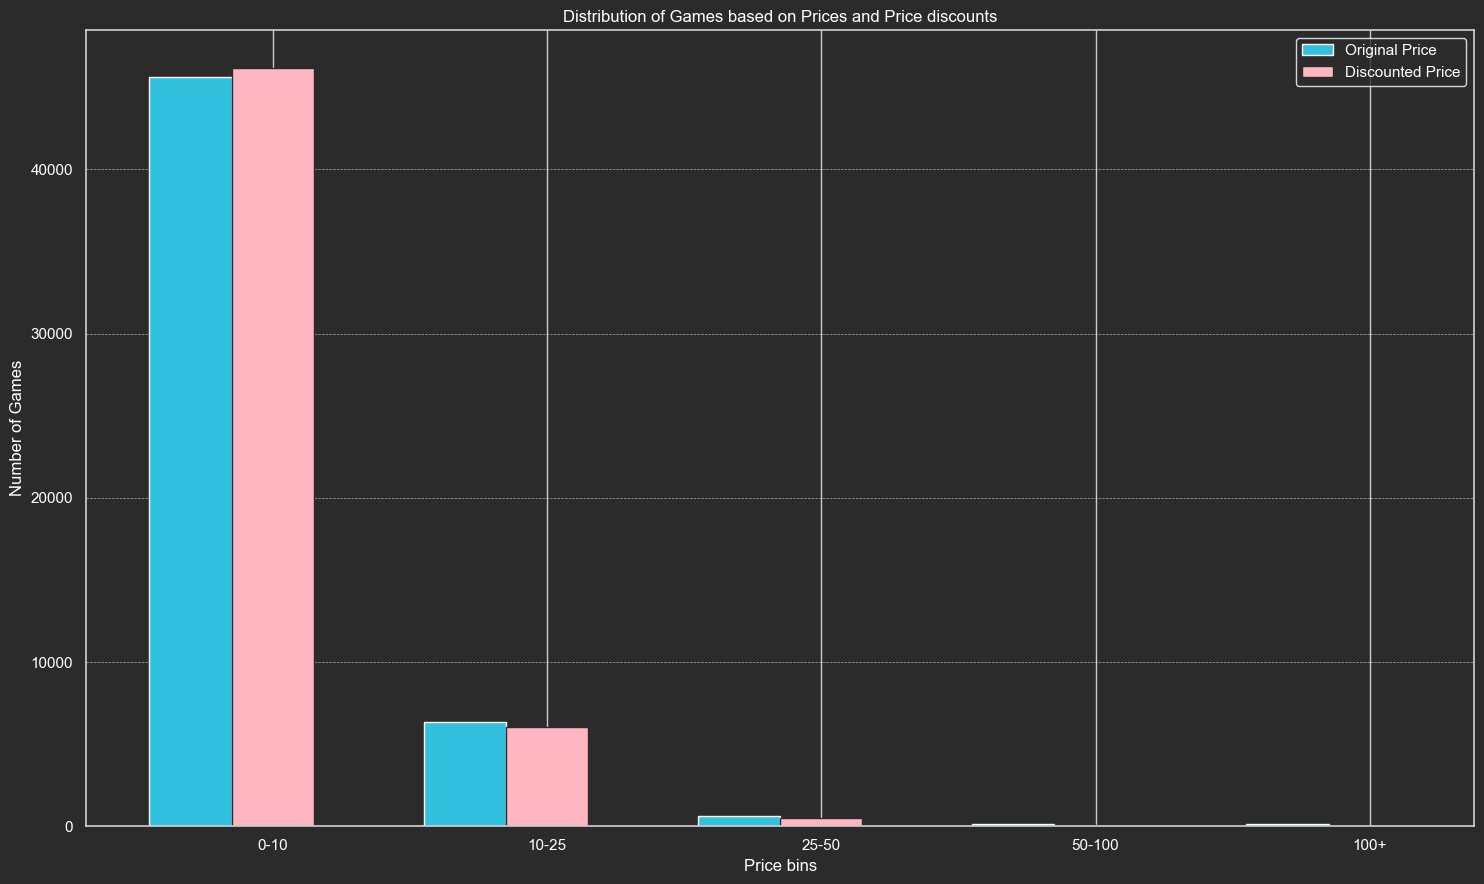

In [62]:
bin_edges = [0, 10, 25, 50, 100, float('inf')]
bin_labels = ['0-10', '10-25', '25-50', '50-100', '100+']

original_price_counts = pd.cut(data['Original Price'], bins=bin_edges, labels=bin_labels).value_counts().sort_index()
discounted_price_counts = pd.cut(data['Discounted Price'], bins=bin_edges, labels=bin_labels).value_counts().sort_index()
price_difference_counts = pd.cut(data['Price Difference'], bins=bin_edges, labels=bin_labels).value_counts().sort_index()

bar_width = 0.3
x = np.arange(len(bin_labels))

fig, ax = plt.subplots(figsize=(15, 9))

ax.set_facecolor('#2B2B2B')
fig.set_facecolor('#2B2B2B')

plt.bar(x - bar_width, original_price_counts, width=bar_width, color='#31C1DE', label='Original Price', edgecolor='white')
plt.bar(x, discounted_price_counts, width=bar_width, color='#FFB6C1', label='Discounted Price', edgecolor='#2B2B2B')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.xticks(x, bin_labels)
plt.xlabel('Price bins', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Games based on Prices and Price discounts', color='white')

legend = ax.legend(facecolor='#2B2B2B', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

ax.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

We can see that pink (discounted) prices are little shifted to the left which presses the idea that some games were pushed into the previous bin category.

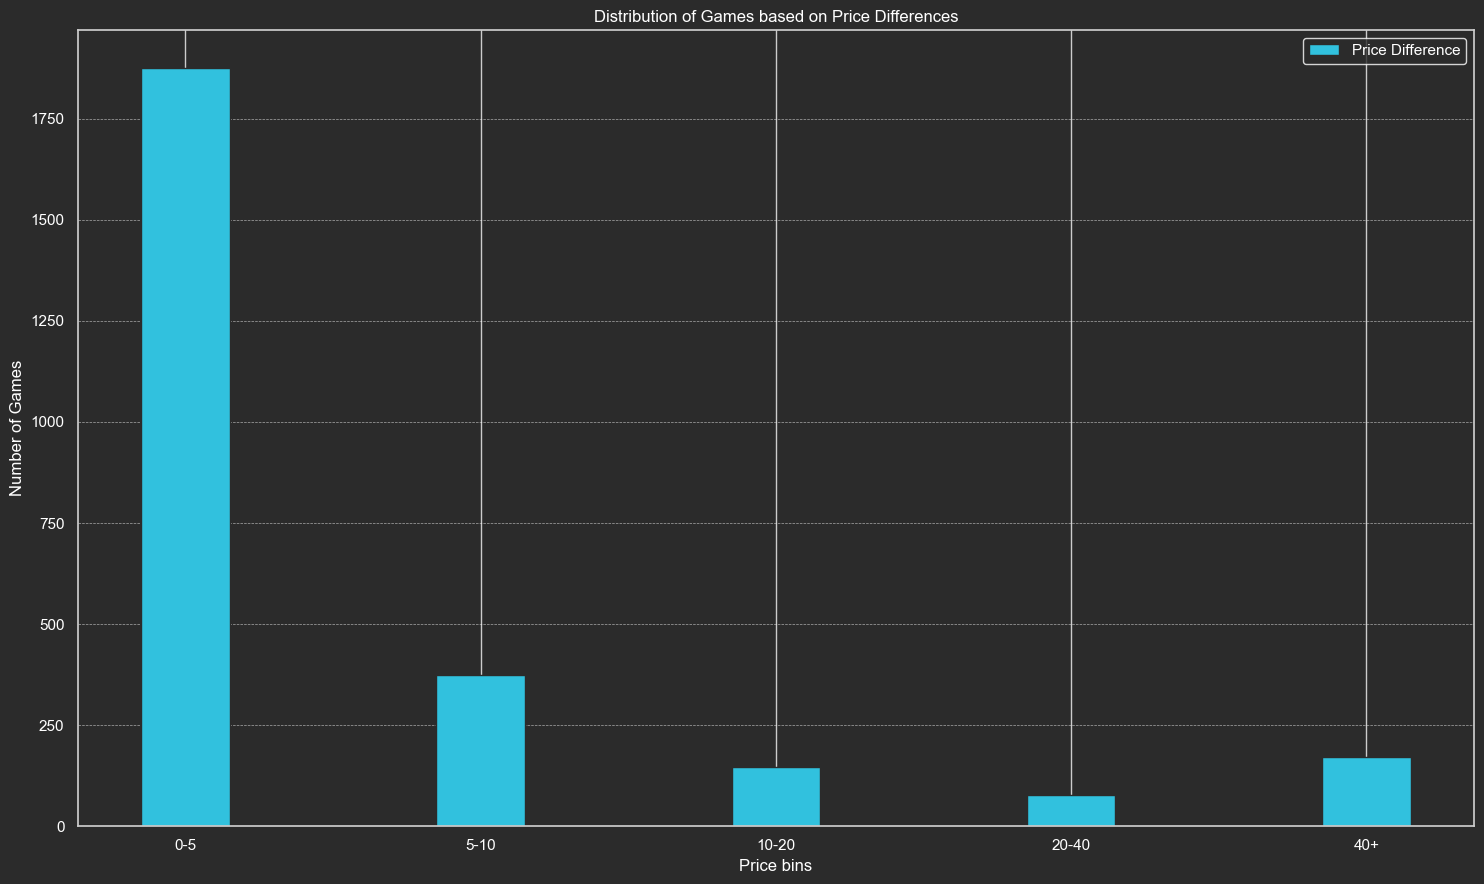

In [63]:
bin_edges = [0, 5, 10, 20, 40, float('inf')]  
bin_labels = ['0-5', '5-10', '10-20', '20-40', '40+']

price_difference_counts = pd.cut(data['Price Difference'], bins=bin_edges, labels=bin_labels).value_counts().sort_index()

bar_width = 0.3
x = np.arange(len(bin_labels))

fig, ax = plt.subplots(figsize=(15, 9))

ax.set_facecolor('#2B2B2B')
fig.set_facecolor('#2B2B2B')

bars = ax.bar(x, price_difference_counts, width=bar_width, color='#31C1DE', label='Price Difference', edgecolor='#2B2B2B')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.xticks(x, bin_labels)
plt.xlabel('Price bins', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Games based on Price Differences', color='white')

legend = ax.legend(facecolor='#2B2B2B', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

ax.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

it is pretty decent output but seems strange how there is a number of discounted games that have more than 40 dollars off

Let us show how correlations are described on scatter plot. Containing Release date in the plot is bad idea but it will help capture anomalies if any

In [64]:
data.head()

Title  Original Price  Discounted Price  \
0                   Baldur's Gate 3           29.99             29.99   
1  Counter-Strike: Global Offensive           14.99             14.99   
2                     Apex Legends‚Ñ¢            0.00              0.00   
3                   Forza Horizon 5           34.78             17.39   
4                     Call of Duty¬Æ            0.00              0.00   

   Price Difference  Release Date  \
0              0.00        2023.0   
1              0.00        2012.0   
2              0.00        2020.0   
3             17.39        2021.0   
4              0.00        2022.0   

                                    Game Description          Reviews Summary  \
0  Baldur‚Äôs Gate 3 is a story-rich, party-based R...  Overwhelmingly Positive   
1  Counter-Strike: Global Offensive (CS: GO) expa...            Very Positive   
2  Apex Legends is the award-winning, free-to-pla...                    Mixed   
3  Your Ultimate Horizon Adventure awaits! Explor...            Very Positive   
4  Welcome to Call of Duty¬Æ HQ, the home of Call ...                    Mixed   

   Reviews_number  Reviews_percentage  \
0        128900.0                96.0   
1         75284.0                89.0   
2         18581.0                65.0   
3          4120.0                87.0   
4          8257.0                49.0   

                                           Developer          Publisher  \
0                                     larian studios     larian studios   
1                   valve, hidden path entertainment              valve   
2                              respawn entertainment    electronic arts   
3                                   playground games  xbox game studios   
4  infinity ward, raven software, beenox, treyarc...         activision   

                                 Supported Languages  \
0  [english, french, german, spanish - spain, pol...   
1  [english, czech, danish, dutch, finnish, frenc...   
2  [english, french, italian, german, spanish - s...   
3  [english, french, italian, german, spanish - s...   
4  [english, french, italian, german, spanish - s...   

                                        Popular Tags  \
0  [rpg, choices matter, character customization,...   
1  [fps, shooter, multiplayer, competitive, actio...   
2  [free to play, multiplayer, battle royale, sho...   
3  [racing, open world, driving, multiplayer, aut...   
4  [fps, multiplayer, shooter, action, singleplay...   

                                       Game Features        Processor  Memory  \
0  [single-player, online co-op, lan co-op, steam...         Intel i5     8.0   
1  [steam achievements, full controller support, ...  Intel Core2 Duo     2.0   
2  [online pvp, online co-op, steam achievements,...           AMD FX     6.0   
3  [single-player, online pvp, online co-op, cros...         Intel i5     8.0   
4  [single-player, online pvp, online co-op, cros...         Intel i5     8.0   

  Graphics_Series  Storage_Clean  Is_Upcoming  description_length  
0         gtx 970          150.0            0                 207  
1          256 mb           15.0            0                 275  
2          gt 640           56.0            0                 284  
3         gtx 970          110.0            0                 288  
4         gtx 960          125.0            0                 124

In [65]:
data.shape

(70342, 20)

### We need to handle the NaN values in Memory Column

In [66]:
data.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary            0
Reviews_number             0
Reviews_percentage         0
Developer                  0
Publisher                  0
Supported Languages        0
Popular Tags               0
Game Features              0
Processor                  0
Memory                 12502
Graphics_Series            0
Storage_Clean              0
Is_Upcoming                0
description_length         0
dtype: int64

In [67]:
for val in data['Memory'].dropna().unique():
    print(val)

8.0

2.0

6.0

16.0

10.0

4.0

0.5

3.0

12.0

1.0

5.0

2.5

0.25

1.5

0.125

7.8125

0.001953125

0.0009765625

0.9765625

3.90625

1.46484375

0.00390625

0.09375

0.48828125

0.390625

2.9296875

2.046875

0.1220703125

0.5009765625

0.0625

0.1875

0.5859375

0.015625

14.0

0.244140625

0.33203125

0.1953125

0.3408203125

0.830078125

0.3515625

1.998046875

0.0078125

0.09765625

0.03125

1.953125

0.248046875

0.375

0.732421875

0.68359375

0.2490234375

1.9765625

0.01953125

0.0390625

0.048828125

0.146484375

0.548828125

0.75

0.41015625

0.478515625

0.3203125

2.44140625

0.3359375

88.0

0.78125

0.29296875

0.078125

0.0029296875

0.2734375

0.029296875

0.15234375

0.439453125

0.005859375

0.0341796875

0.341796875

0.009765625

0.21484375

0.1171875

0.3564453125

15.0

0.0546875

0.2529296875

35.0

0.0244140625

0.650390625

0.0830078125

1.205078125

32.0

0.87890625

0.76171875

0.59765625

0.3125

0.13671875

0.05859375

3.99609375

0.234375

42.0

0.016601

From these cases we can see some numbers were inputted as trolls, and some where failed to be casted as GB (1024, 2048...) we should address this situation

In [68]:
from sklearn.ensemble import RandomForestRegressor

features = ['Original Price', 'Discounted Price', 'Price Difference', 'Reviews_number', 'Reviews_percentage', 'Is_Upcoming', 'description_length']

train_data = data[data['Memory'].notna()]
predict_data = data[data['Memory'].isna()]

X_train = train_data[features]
y_train = train_data['Memory']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

X_predict = predict_data[features]
predicted_memory = model.predict(X_predict)

predicted_memory = np.clip(predicted_memory, 0, 64)  

data.loc[data['Memory'].isna(), 'Memory'] = predicted_memory

data['Memory'] = data['Memory'].round().astype(int)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast

  return values.astype(dtype, copy=copy)


In [69]:
for val in data['Memory'].dropna().unique():
    print(val)

8

2

6

16

10

4

0

3

12

22

5

7

1

14

88

15

35

32

42

512

-2147483648

9

21

33

11

2000

64

4000

69

1024

226

55

4096

2048

19942

17

24

500

8000

13

23


In [70]:
troll_numbers = [88, -2147483648, 2000, 4000, 69, 19942, 500, 8000, 226]

def adjust_memory_values(x):
    if x in troll_numbers:
        return np.nan
    elif x == 512:
        return 0.5
    elif x == 1024:
        return 1
    elif x == 2048:
        return 2
    elif x == 4096:
        return 4
    else:
        return x

data['Memory'] = data['Memory'].apply(adjust_memory_values)

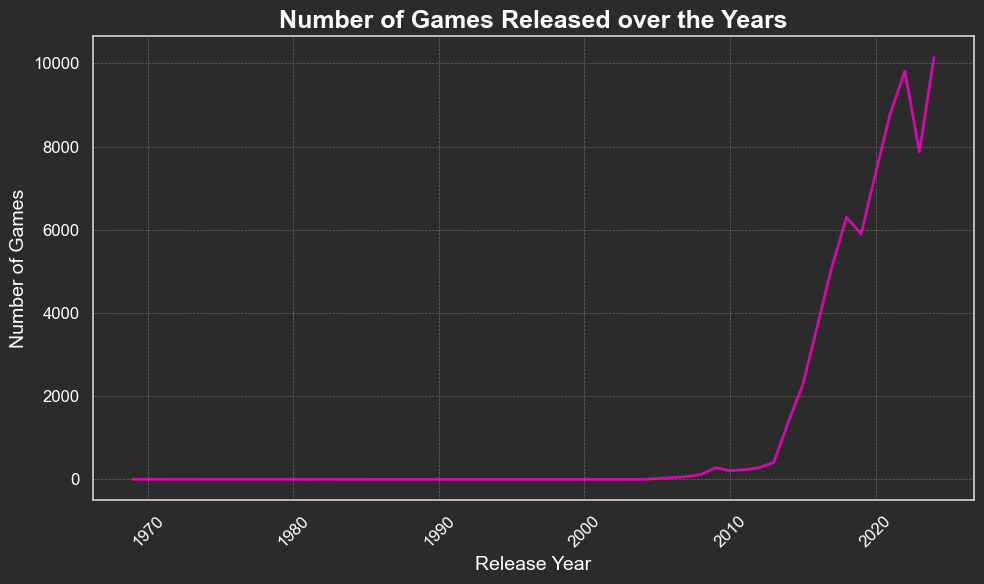

In [71]:
yearly_counts = data['Release Date'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, color='#FF00CE', linewidth=2, alpha=0.8, ax=ax)

ax.set_xlabel('Release Year', fontsize=14, color='white')
ax.set_ylabel('Number of Games', fontsize=14, color='white')
ax.set_title('Number of Games Released over the Years', fontsize=18, fontweight='bold', color='white')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#6A6A6A')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We can see how much more games are released in last decade compared to earlier ages.

## Exploring the Release date, let us see how prices have changed.

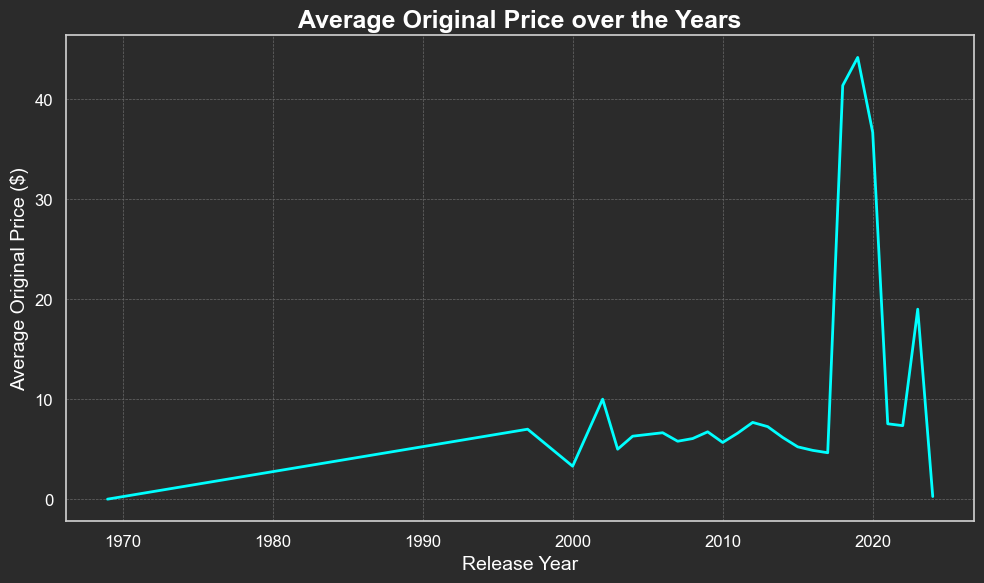

In [72]:
average_prices = data.groupby('Release Date')['Original Price'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

sns.lineplot(y=average_prices.values, x=average_prices.index, color='cyan', linewidth=2, ax=ax)

ax.set_xlabel('Release Year', fontsize=14, color='white')
ax.set_ylabel('Average Original Price ($)', fontsize=14, color='white')
ax.set_title('Average Original Price over the Years', fontsize=18, fontweight='bold', color='white')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#6A6A6A')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)

plt.tight_layout()
plt.show()

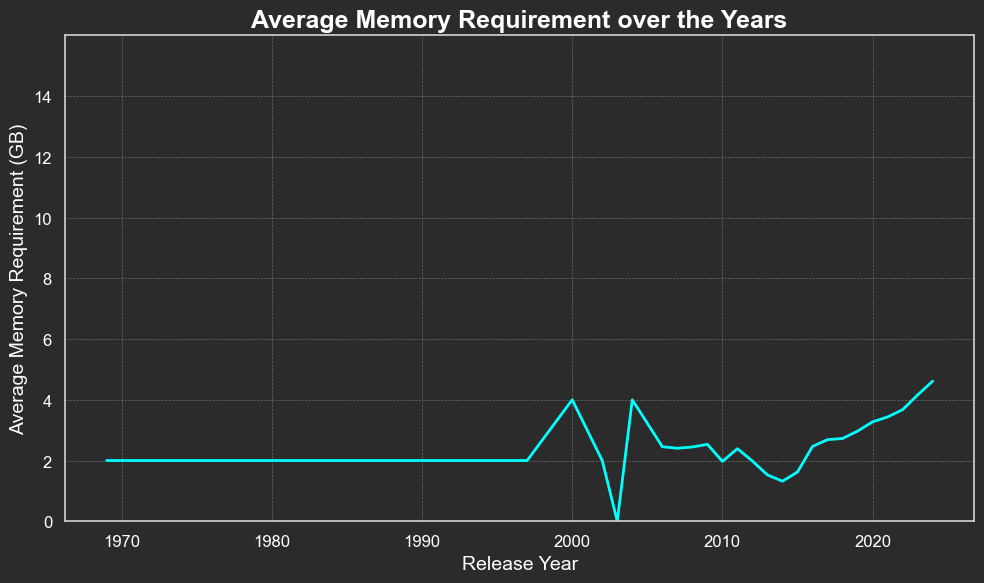

In [73]:
average_memory = data.groupby('Release Date')['Memory'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

sns.lineplot(x=average_memory.index, y=average_memory.values, color='cyan', linewidth=2, ax=ax)

ax.set_xlabel('Release Year', fontsize=14, color='white')
ax.set_ylabel('Average Memory Requirement (GB)', fontsize=14, color='white')
ax.set_title('Average Memory Requirement over the Years', fontsize=18, fontweight='bold', color='white')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#6A6A6A')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)
ax.set_ylim(0, 16)
ax.set_yticks(list(range(0, 16, 2)))

plt.tight_layout()
plt.show()

In [74]:
data.isna().sum()

Title                   0
Original Price          0
Discounted Price        0
Price Difference        0
Release Date            0
Game Description        0
Reviews Summary         0
Reviews_number          0
Reviews_percentage      0
Developer               0
Publisher               0
Supported Languages     0
Popular Tags            0
Game Features           0
Processor               0
Memory                 11
Graphics_Series         0
Storage_Clean           0
Is_Upcoming             0
description_length      0
dtype: int64

In [75]:
mean_memory = data['Memory'].mean()
data['Memory'].fillna(mean_memory, inplace=True)

Let us do the same inquiery about the Stroge column

In [76]:
for val in data['Storage_Clean'].dropna().unique():
    print(val)

150.0

15.0

56.0

110.0

125.0

40.0

80.0

70.0

25.0

35.0

72.0

61.0

50.0

60.0

17.0

95.0

2.0

21.0

100.0

10.0

105.0

16.0

20.0

1.0

120.0

83.0

26.0

7.0

85.0

90.0

0.5

4.0

59.0

3.0

45.0

8.0

75.0

0.6

30.0

6.0

12.0

22.0

0.449

0.8

36.0

5.0

13.0

115.0

155.0

2.048

0.3

1.25

52.0

103.0

175.0

14.0

13.5

1.5

41.0

43.0

160.0

0.2

9.0

55.0

31.0

18.0

67.0

126.0

170.0

0.1

77.0

0.25

42.0

0.738

23.0

0.95

65.0

0.85

1.6

0.14

0.83

19.0

0.05

24.0

0.35

0.7

27.0

1.8

1.024

0.065

32.0

0.9

0.4

1.2

11.0

0.256

4.5

0.12

0.65

54.0

0.015

1.3

0.512

28.0

37.0

6.5

34.0

47.0

49.0

0.03

0.55

0.51

0.384

0.75

0.723

0.379

1.7

8.5

33.0

0.32

1.4

0.768

0.06

0.15

0.116

0.38

0.165

38.0

1.536

1.9

32.5

0.36

1.1

20.3

0.145

0.64

0.543

6.7

39.0

51.0

0.08

0.13

8.739

0.075

44.0

0.16

0.68

0.036

3.5

3.7

0.98

4.158

0.09

0.45

48.0

68.0

0.18

2.51

0.9162899999999999

0.66

0.04

6.4

0.069

0.168



In [77]:
data['Storage_Clean'] = data['Storage_Clean'].replace(94403294917935.7, data[data['Storage_Clean'] != 94403294917935.7]['Storage_Clean'].mean())

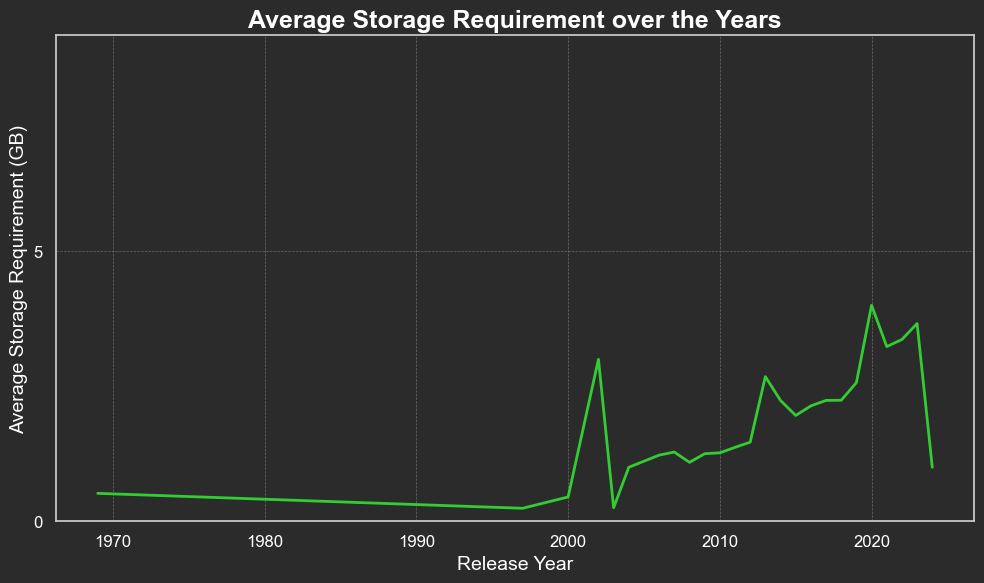

In [78]:
average_storage = data.groupby('Release Date')['Storage_Clean'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

sns.lineplot(x=average_storage.index, y=average_storage.values, color='limegreen', linewidth=2, ax=ax)

ax.set_xlabel('Release Year', fontsize=14, color='white')
ax.set_ylabel('Average Storage Requirement (GB)', fontsize=14, color='white')
ax.set_title('Average Storage Requirement over the Years', fontsize=18, fontweight='bold', color='white')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#6A6A6A')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)
ax.set_ylim(0, max(average_storage.values) + 5)
ax.set_yticks(list(range(0, int(max(average_storage.values) + 5), 5)))

plt.tight_layout()
plt.show()

there is drastic increments in average storage requirements in early 2000s which is unexpected. However, we can explain it that after that time developers took a big step in optimizing games and thus making required memory smaller.

In [79]:
data.isnull().sum()

Title                  0
Original Price         0
Discounted Price       0
Price Difference       0
Release Date           0
Game Description       0
Reviews Summary        0
Reviews_number         0
Reviews_percentage     0
Developer              0
Publisher              0
Supported Languages    0
Popular Tags           0
Game Features          0
Processor              0
Memory                 0
Graphics_Series        0
Storage_Clean          0
Is_Upcoming            0
description_length     0
dtype: int64

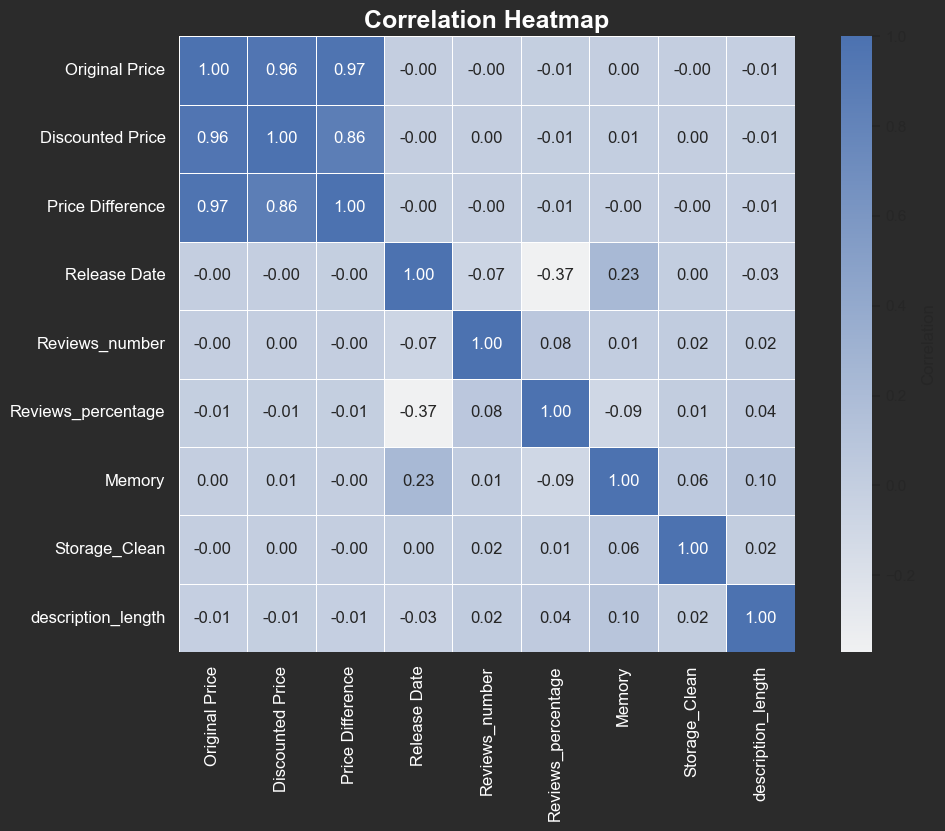

In [80]:
numerical_columns = [column for column in data.columns if data[column].dtype in ['int64', 'float64']] 

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(
    data[numerical_columns].corr(),
    annot=True,
    fmt=".2f",
    cmap=cmap,  
    linewidths=.5,
    cbar_kws={"label": "Correlation", "orientation": "vertical"},
    square=True,
    ax=ax
)

ax.set_title('Correlation Heatmap', fontsize=18, fontweight='bold', color='white')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)

plt.show()

After handling the Mamory and Storage we see theya re not longer perfectly correlated.

In [81]:
data

Title  Original Price  Discounted Price  \
0                         Baldur's Gate 3           29.99             29.99   
1        Counter-Strike: Global Offensive           14.99             14.99   
2                           Apex Legends‚Ñ¢            0.00              0.00   
3                         Forza Horizon 5           34.78             17.39   
4                           Call of Duty¬Æ            0.00              0.00   
...                                   ...             ...               ...   
70337                          Sunkenland            0.00              0.00   
70338                           The Front            0.00              0.00   
70339                        The Bornless            0.00              0.00   
70340                     Winter Memories            0.00              0.00   
70341  Call of Duty¬Æ: Modern Warfare¬Æ III           69.99             69.99   

       Price Difference  Release Date  \
0                  0.00        2023.0   
1                  0.00        2012.0   
2                  0.00        2020.0   
3                 17.39        2021.0   
4                  0.00        2022.0   
...                 ...           ...   
70337              0.00        2024.0   
70338              0.00        2024.0   
70339              0.00        2024.0   
70340              0.00        2024.0   
70341              0.00        2024.0   

                                        Game Description  \
0      Baldur‚Äôs Gate 3 is a story-rich, party-based R...   
1      Counter-Strike: Global Offensive (CS: GO) expa...   
2      Apex Legends is the award-winning, free-to-pla...   
3      Your Ultimate Horizon Adventure awaits! Explor...   
4      Welcome to Call of Duty¬Æ HQ, the home of Call ...   
...                                                  ...   
70337  Get ready for a Waterworld-themed survival gam...   
70338  The Front is a survival-open-world-crafting (S...   
70339  Welcome to The Bornless, an action horror FPS....   
70340  After the unforgettable summer memories you‚Äôve...   
70341  In the direct sequel to the record-breaking Ca...   

               Reviews Summary  Reviews_number  Reviews_percentage  \
0      Overwhelmingly Positive        128900.0                96.0   
1                Very Positive         75284.0                89.0   
2                        Mixed         18581.0                65.0   
3                Very Positive          4120.0                87.0   
4                        Mixed          8257.0                49.0   
...                        ...             ...                 ...   
70337                  Unknown             0.0                 0.0   
70338                  Unknown             0.0                 0.0   
70339                  Unknown             0.0                 0.0   
70340                  Unknown             0.0                 0.0   
70341                  Unknown             0.0                 0.0   

                                               Developer          Publisher  \
0                                         larian studios     larian studios   
1                       valve, hidden path entertainment              valve   
2                                  respawn entertainment    electronic arts   
3                                       playground games  xbox game studios   
4      infinity ward, raven software, beenox, treyarc...         activision   
...                                                  ...                ...   
70337                                     vector3 studio     vector3 studio   
70338                                       samar studio       samar studio   
70339                                  cathedral studios  cathedral studios   
70340                                        dojin otome       kagura games   
70341  sledgehammer games, treyarch, infinity ward, b...         activision   

                                     Supported Languages  \
0      [engli

Let us see distribution of summary types

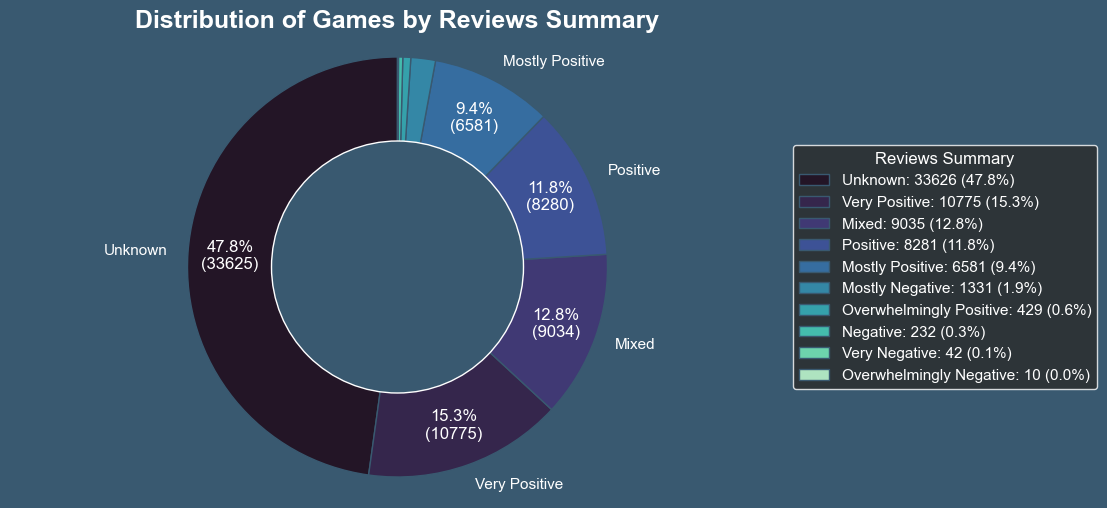

In [82]:
reviews_summary_counts = data['Reviews Summary'].value_counts()
palette = sns.color_palette("mako", len(reviews_summary_counts))

threshold = 5

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct < threshold:
        return ""
    else:
        return f"{pct:.1f}%\n({absolute:d})"

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#395970')
fig.patch.set_facecolor('#395970')

labels = [label if (value/reviews_summary_counts.sum())*100 >= threshold else '' for label, value in zip(reviews_summary_counts.index, reviews_summary_counts)]
plt.pie(
    reviews_summary_counts, 
    labels=labels, 
    colors=palette, 
    autopct=lambda pct: func(pct, reviews_summary_counts), 
    startangle=90, 
    pctdistance=0.8, 
    textprops={'color': 'white'},
    wedgeprops=dict(width=0.5, edgecolor='#395970')
)

total = reviews_summary_counts.sum()
legend_labels = [f'{label}: {count} ({count/total*100:.1f}%)' for label, count in zip(reviews_summary_counts.index, reviews_summary_counts)]
legend = plt.legend(legend_labels, title='Reviews Summary', loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#2B2B2B', edgecolor='white', title_fontsize=12)
plt.setp(legend.get_texts(), color='white')  
plt.setp(legend.get_title(), color='white')  

plt.title('Distribution of Games by Reviews Summary', fontsize=18, fontweight='bold', color='white')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc='#395970'))
plt.axis('equal')

plt.show()

### Find out on average how each developers games are rated

In [83]:
developer_reviews_mode = data.groupby('Developer')['Reviews Summary'].agg(pd.Series.mode)
developer_reviews_mode

Developer
!cyberapex (skagogames)            Unknown
"nieko"                    Mostly Positive
"revday studio"                   Positive
#12                                Unknown
#lol entertainment                 Unknown
                                ...       
Ôºàhong kongÔºâgkd               Very Positive
ùï≤ùñóùñÜùñìùñâùï∏ùñéùñìùñé ùïæùñôùñöùñâùñéùñîùñò (·ö¥·õò·õã)            Unknown
ùôÖùòºùôÑùôá                               Unknown
üëÅÔ∏è                                   Mixed
üìöÁìúÂ±±‰π¶Âùäguashan bookshop              Unknown
Name: Reviews Summary, Length: 44816, dtype: object

In [84]:
developer_reviews_mode = developer_reviews_mode.apply(lambda x: x if isinstance(x, str) else x[0])

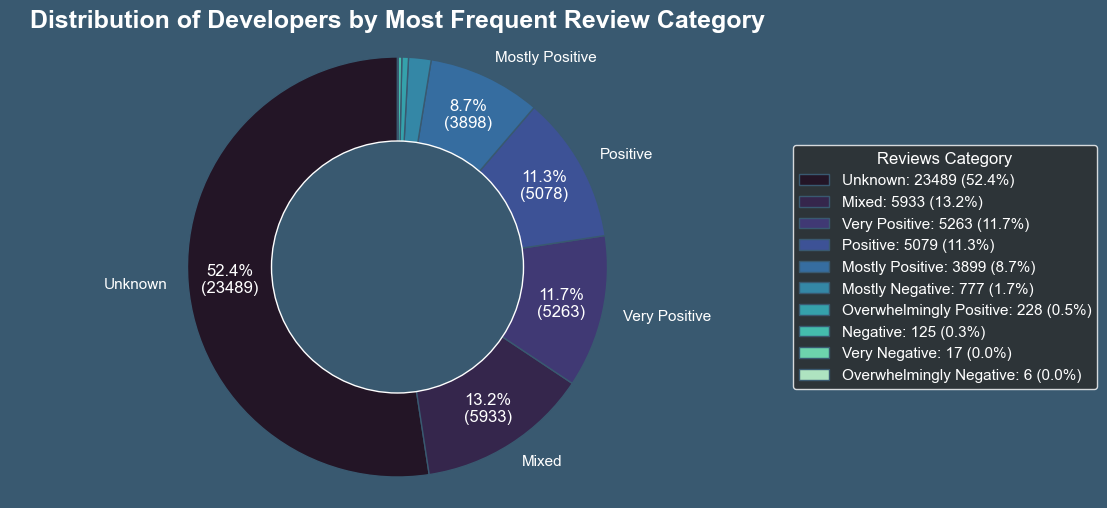

In [85]:
category_counts_reviews = developer_reviews_mode.value_counts()

palette = sns.color_palette("mako", len(category_counts_reviews))

threshold = 5  

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct < threshold:
        return ""
    else:
        return f"{pct:.1f}%\n({absolute:d})"

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#395970')
fig.patch.set_facecolor('#395970')

labels = [label if (value/category_counts_reviews.sum())*100 >= threshold else '' for label, value in zip(category_counts_reviews.index, category_counts_reviews)]
plt.pie(
    category_counts_reviews, 
    labels=labels, 
    colors=palette, 
    autopct=lambda pct: func(pct, category_counts_reviews), 
    startangle=90, 
    pctdistance=0.8, 
    textprops={'color': 'white'},
    wedgeprops=dict(width=0.5, edgecolor='#395970')  
)

total = len(developer_reviews_mode)
legend_labels = [f'{label}: {count} ({count/total*100:.1f}%)' for label, count in zip(category_counts_reviews.index, category_counts_reviews)]
legend = plt.legend(legend_labels, title='Reviews Category', loc='center left', bbox_to_anchor=(1, 0.5), facecolor='#2B2B2B', edgecolor='white', title_fontsize=12)
plt.setp(legend.get_texts(), color='white')  
plt.setp(legend.get_title(), color='white')

plt.title('Distribution of Developers by Most Frequent Review Category', fontsize=18, fontweight='bold', color='white')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc='#395970'))
plt.axis('equal')

plt.show()

### Let us visually capture how logically related features are distributed and if their relationship is more consistent or variable

### Prices

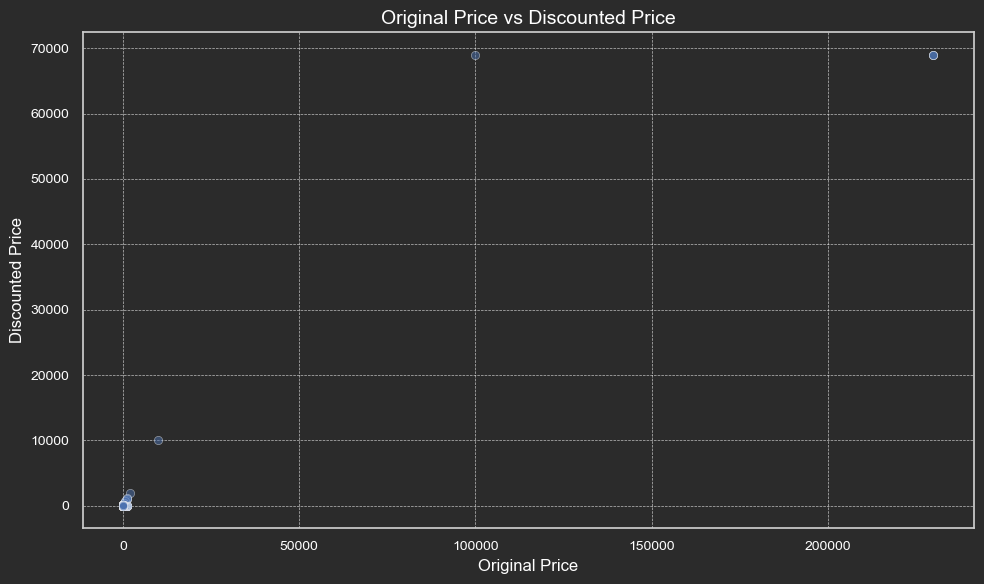

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

sns.scatterplot(data=data, x='Original Price', y='Discounted Price', alpha=0.5)

plt.xlabel('Original Price', fontsize=12, color='white')
plt.ylabel('Discounted Price', fontsize=12, color='white')
plt.title('Original Price vs Discounted Price', fontsize=14, color='white')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.tight_layout()

plt.show()

We see that some games are extremely expensive. After doing reserach we found out that several games had ridiculously high prices. One of them went to as high as 1M dollars. 
However, all these were marketing tricks and later were changed to decent prices. For now the most expensive app is 2K$. We can omit everything else that has bigger price. 

In [87]:
data = data[(data['Original Price'] <= 2000) & (data['Original Price'] >= 0)]

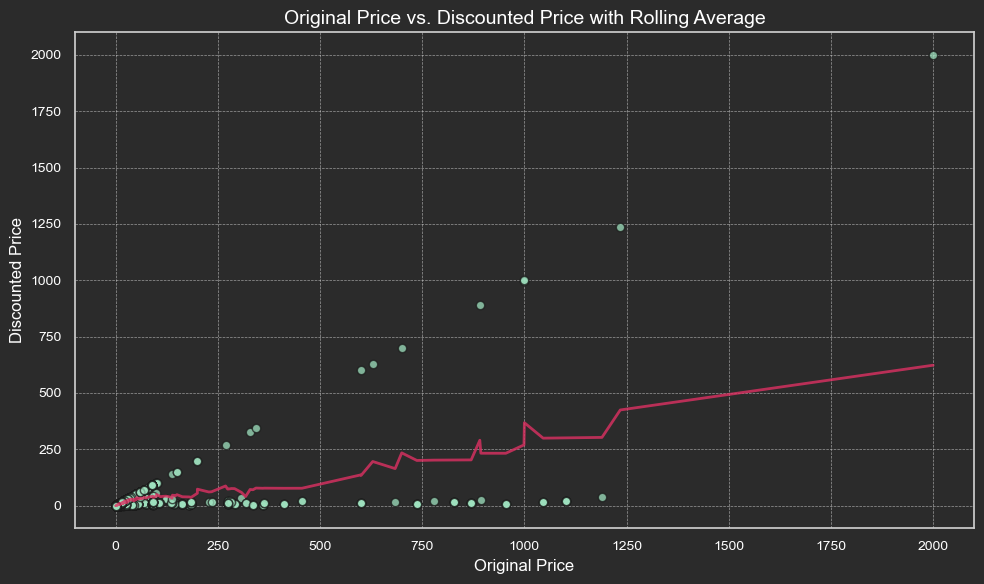

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

plt.scatter(data['Original Price'], data['Discounted Price'], marker='o', color='#9FE2BF', edgecolor='k', alpha=0.75)

rolling_avg = data.groupby("Original Price")["Discounted Price"].mean().rolling(window=10, min_periods=1).mean()
sns.lineplot(x=rolling_avg.index, y=rolling_avg, color='#DE3163', linewidth=2, alpha=0.8)

plt.xlabel('Original Price', fontsize=12, color='white')
plt.ylabel('Discounted Price', fontsize=12, color='white')
plt.title('Original Price vs. Discounted Price with Rolling Average', fontsize=14, color='white')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.tight_layout()

plt.show()

So, some part of the scatter is linear and some of them has discounts and thus the gra

In [89]:
max_price_diff_index = data['Price Difference'].idxmax()
row_with_max_price_diff = data.loc[max_price_diff_index]
print(row_with_max_price_diff)

Title                                                          Snowboard

Original Price                                                   1189.77

Discounted Price                                                   39.45

Price Difference                                                 1150.32

Release Date                                                      2021.0

Game Description                        Go snowboarding and earn points.

Reviews Summary                                                  Unknown

Reviews_number                                                       0.0

Reviews_percentage                                                   0.0

Developer                                                           hede

Publisher                                                           hede

Supported Languages    [english, french, italian, german, spanish - s...

Popular Tags           [sports, arena shooter, on-rails shooter, prec...

Game Features          [single-player,

Some games had huge prices and very low discounted prices, so we checked one of them. While the case might seem unreal this is descripts reality. The price is very big but it is for game bundle. And the discount is really big

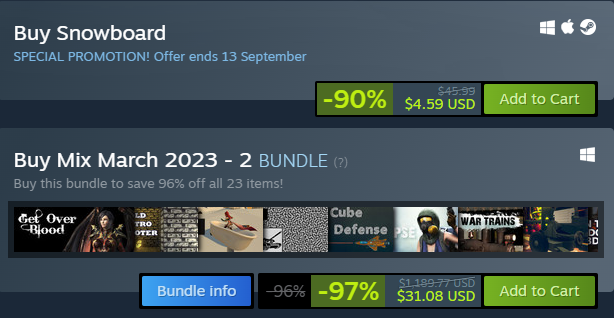

In [90]:
from IPython.display import display, Image

gif_path = 'C:/Users/user/Desktop/DATA SCIENCE/Final/screenshot1.png'


display(Image(filename=gif_path))

C:\Users\user\AppData\Local\Temp\ipykernel_13272\1526812233.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator

  cb.ax.set_yticklabels(cb.get_ticks(), color='white')


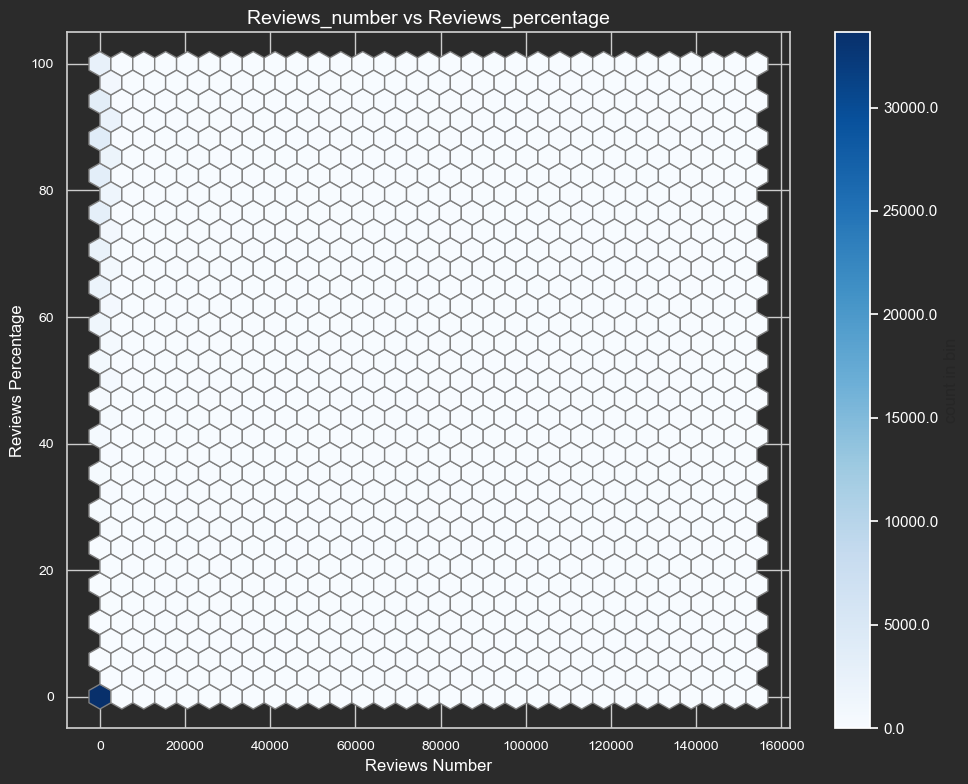

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

hb = plt.hexbin(data['Reviews_number'], data['Reviews_percentage'], gridsize=30, cmap='Blues', edgecolors='gray')
cb = plt.colorbar(hb, label='count in bin', ax=ax)
cb.outline.set_edgecolor('white')
cb.ax.yaxis.set_tick_params(color='white')
cb.ax.set_yticklabels(cb.get_ticks(), color='white')

plt.xlabel('Reviews Number', fontsize=12, color='white')
plt.ylabel('Reviews Percentage', fontsize=12, color='white')
plt.title('Reviews_number vs Reviews_percentage', fontsize=14, color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

plt.tight_layout()

plt.show()

This graph gives general idea that substantial amount of Games have zero reviews and percentages, but it is not descriptive. Taking galnse at logarithm function of this plot will make the situation clearer.

C:\Users\user\AppData\Local\Temp\ipykernel_13272\3583445736.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator

  cb.ax.set_yticklabels(cb.get_ticks(), color='white')


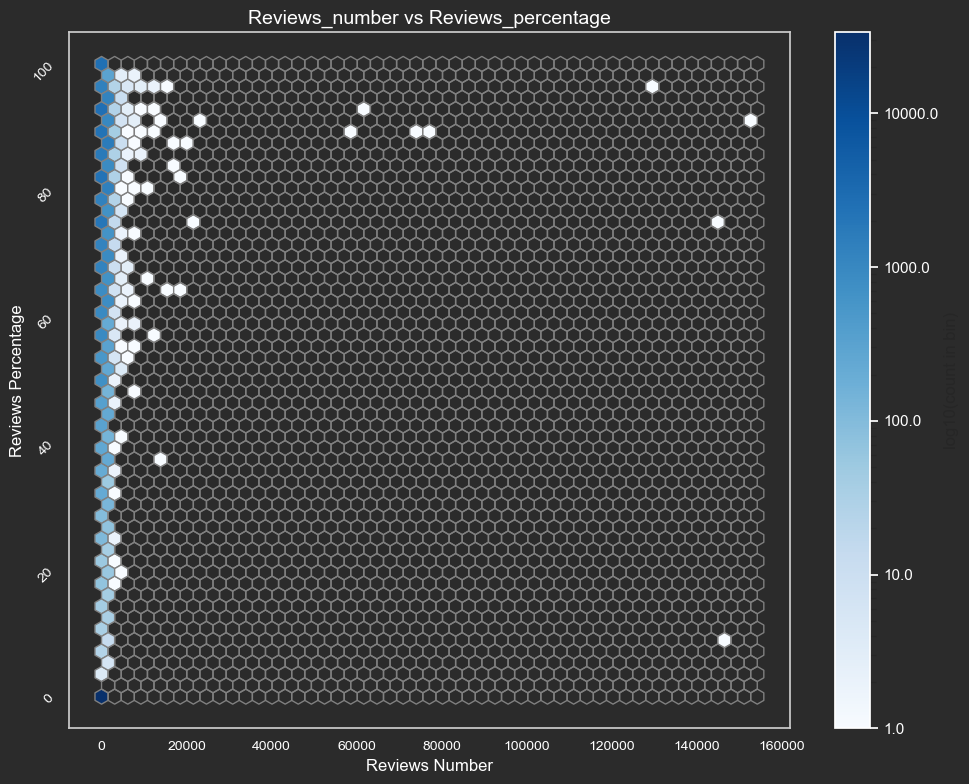

In [92]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')
ax.grid(False)  

hb = plt.hexbin(data['Reviews_number'], data['Reviews_percentage'], gridsize=50, cmap='Blues', bins='log', edgecolors='gray')
cb = plt.colorbar(hb, label='log10(count in bin)', ax=ax)
cb.outline.set_edgecolor('white')
cb.ax.yaxis.set_tick_params(color='white')
cb.ax.set_yticklabels(cb.get_ticks(), color='white')

plt.xlabel('Reviews Number', fontsize=12, color='white')
plt.ylabel('Reviews Percentage', fontsize=12, color='white')
plt.title('Reviews_number vs Reviews_percentage', fontsize=14, color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white', rotation=45)

plt.tight_layout()

plt.show()

## Let us see how much different features vary for whole dataset and subset of Overwhemingly Positive games.

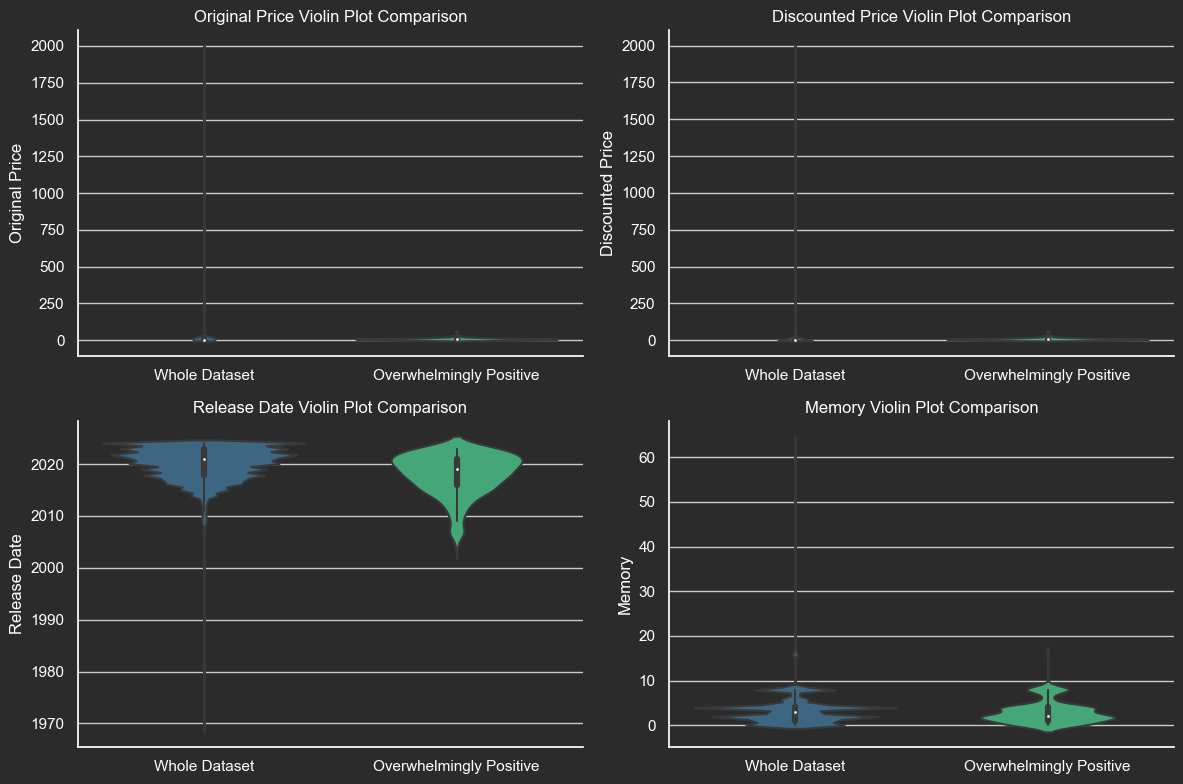

In [93]:
subset_data = data[data['Reviews Summary'] == 'Overwhelmingly Positive'].dropna(subset=['Original Price', 'Discounted Price', 'Release Date', 'Memory'])

features = ['Original Price', 'Discounted Price', 'Release Date', 'Memory']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.patch.set_facecolor('#2B2B2B')

for i, feature in enumerate(features):
    ax = axes[i // 2][i % 2]

    sns.violinplot(x='Subset', y=feature, 
                   data=pd.concat([data.assign(Subset='Whole Dataset'), subset_data.assign(Subset='Overwhelmingly Positive')]),
                   ax=ax, palette="viridis")
    
    ax.set_facecolor('#2B2B2B')
    
    ax.set_title(f'{feature} Violin Plot Comparison', color='white')
    ax.set_xlabel('', color='white')
    ax.set_ylabel(feature, color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

We can see how overwhelmingly positive subset has somewhat different distributions.

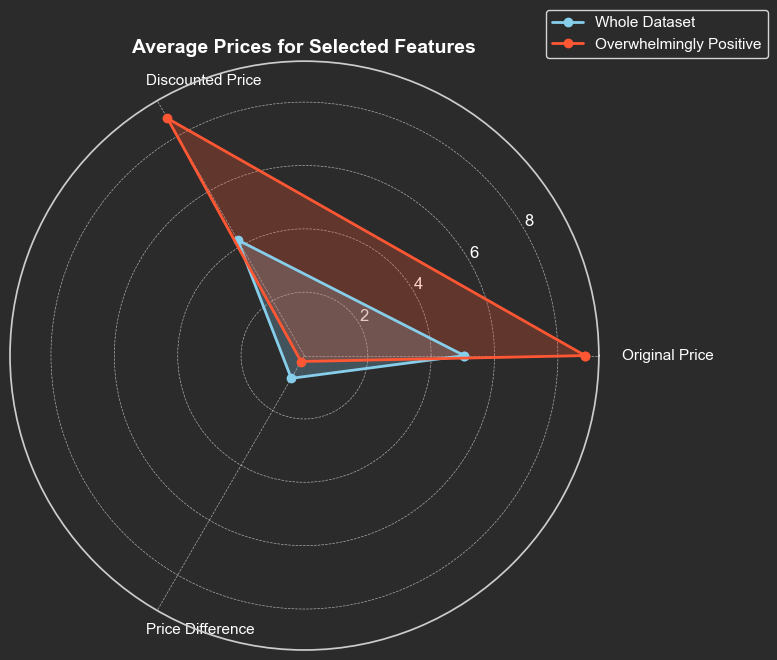

In [94]:
overwhelmingly_positive_data = data[data['Reviews Summary'] == 'Overwhelmingly Positive']

avg_whole_dataset = data[['Original Price', 'Discounted Price', 'Price Difference']].mean().values
avg_overwhelmingly_positive = overwhelmingly_positive_data[['Original Price', 'Discounted Price', 'Price Difference']].mean().values

column_names = ['Original Price', 'Discounted Price', 'Price Difference']

num_variables = len(column_names)
angles = np.linspace(0, 2 * np.pi, num_variables, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

ax.set_facecolor('#2B2B2B')
fig.set_facecolor('#2B2B2B')

ax.plot(angles, np.concatenate((avg_whole_dataset, [avg_whole_dataset[0]])), 'o-', linewidth=2, label="Whole Dataset", color='skyblue')
ax.fill(angles, np.concatenate((avg_whole_dataset, [avg_whole_dataset[0]])), color='skyblue', alpha=0.25)

ax.plot(angles, np.concatenate((avg_overwhelmingly_positive, [avg_overwhelmingly_positive[0]])), 'o-', linewidth=2, label="Overwhelmingly Positive", color='#FF5733') 
ax.fill(angles, np.concatenate((avg_overwhelmingly_positive, [avg_overwhelmingly_positive[0]])), color='#FF5733', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(column_names, color='white', ha='left') 

ax.set_rlabel_position(30)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.6)

ax.set_title('Average Prices for Selected Features', fontsize=14, fontweight='bold', color='white')

legend = ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), facecolor='#2B2B2B', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

plt.tight_layout()
plt.show()

Graph suggests that games with these overwhelmingly positive reviews tend to have a higher price point, both in terms of original and discounted prices. However, since the "Price Difference" metric is smaller for the "Overwhelmingly Positive" subset, it indicates that although these games are priced higher, they tend to have smaller discounts. It gives us idea that game will not receive positive ratings just because of the discounts.

### Time series

In [95]:
grouped_data = data.groupby('Release Date').agg({
    'Original Price': 'mean',
    'Discounted Price': 'mean'
}).reset_index()

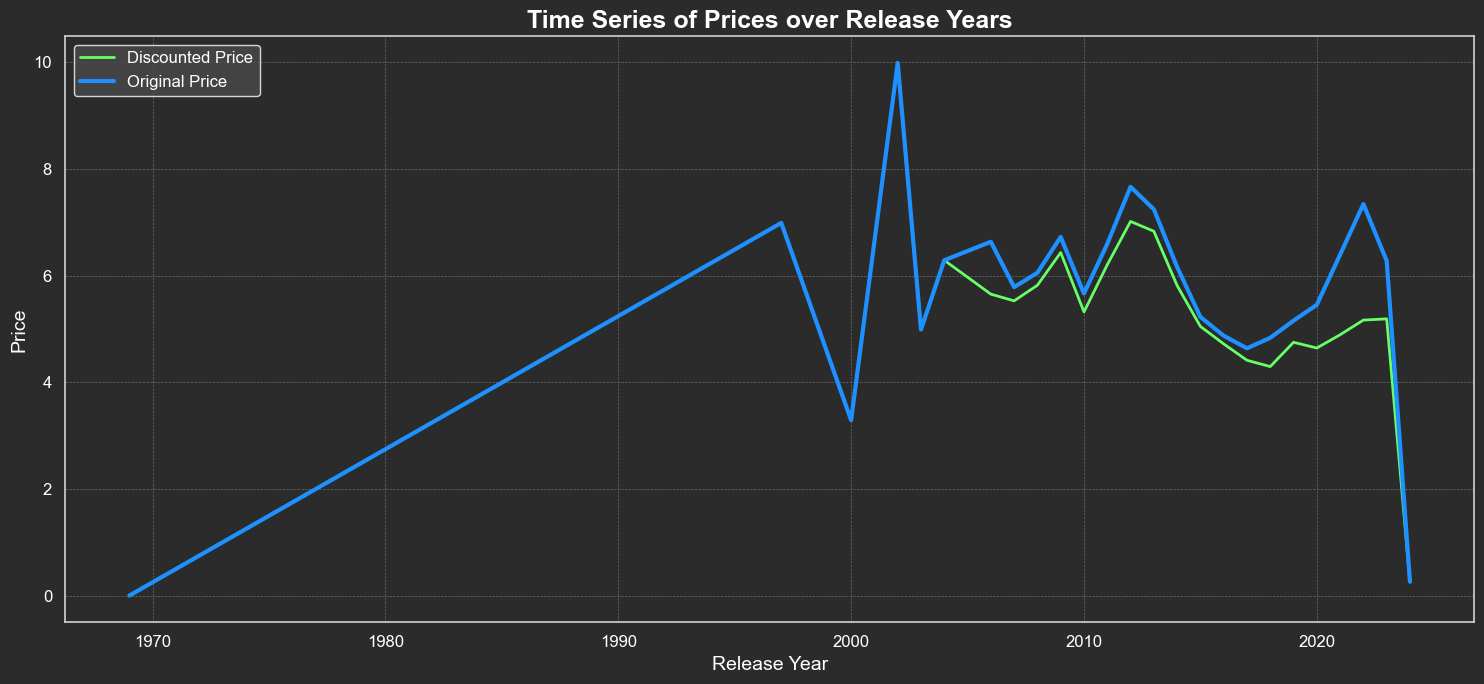

In [96]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

ax.plot(grouped_data['Release Date'], grouped_data['Discounted Price'], label='Discounted Price', color='#66FF66', linewidth=2, zorder=1)

ax.plot(grouped_data['Release Date'], grouped_data['Original Price'], label='Original Price', color='#1E90FF', linewidth=3, zorder=2)

ax.set_title('Time Series of Prices over Release Years', fontsize=18, fontweight='bold', color='white')
ax.set_xlabel('Release Year', fontsize=14, color='white')
ax.set_ylabel('Price', fontsize=14, color='white')

leg = ax.legend(frameon=True, fontsize=12, loc='upper left', facecolor='#4A4A4A', edgecolor='white')
for text in leg.get_texts():
    text.set_color("white")

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#6A6A6A')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)

plt.tight_layout()
plt.show()

From here we can see that the original prices and discounted prices follow roughly the same pattern. Another capture here is that oldest game to have discount was released in around 2005. We can check what year it actually is

In [97]:
discounted_games = data[data['Price Difference'] > 0]

oldest_discounted_game = data[data['Price Difference'] > 0].sort_values('Release Date').iloc[0]

print(data[data['Price Difference'] > 0].sort_values('Release Date').iloc[0]['Title'])
print(data[data['Price Difference'] > 0].sort_values('Release Date').iloc[0]['Release Date'])

688(I) Hunter/Killer

2006.0


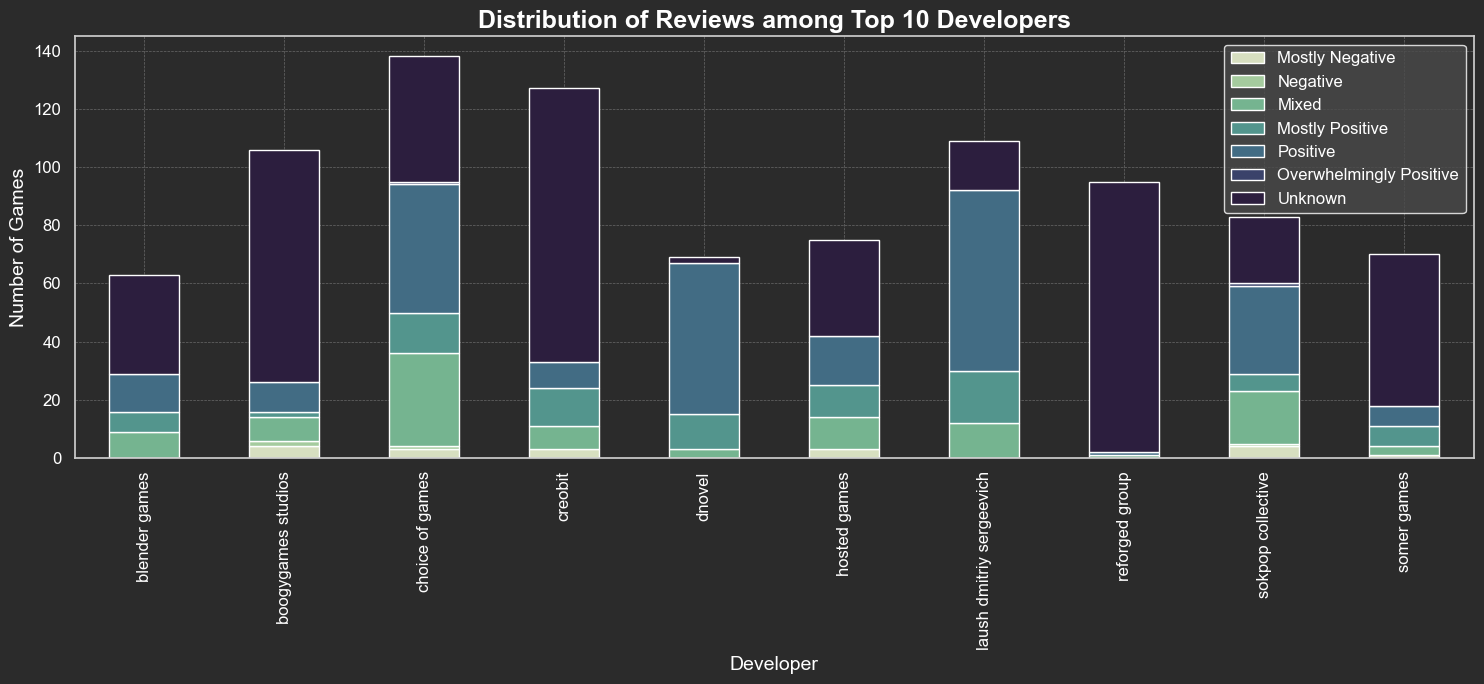

In [98]:
ordered_reviews = ["Mostly Negative", "Negative", "Mixed", "Mostly Positive", "Positive", "Overwhelmingly Positive", "Unknown"]

top_developers = data['Developer'].value_counts().head(10).index

filtered_data = data[data['Developer'].isin(top_developers)]

pivot_data = pd.crosstab(index=filtered_data['Developer'], columns=filtered_data['Reviews Summary'])

pivot_data = pivot_data[ordered_reviews]

fig, ax = plt.subplots(figsize=(15, 7))

colors = sns.cubehelix_palette(start=.5, rot=-.75, n_colors=pivot_data.shape[1])

pivot_data.plot(kind='bar', stacked=True, ax=ax, color=colors, zorder=2)

ax.set_facecolor('#2B2B2B')
fig.patch.set_facecolor('#2B2B2B')

ax.set_title('Distribution of Reviews among Top 10 Developers', fontsize=18, fontweight='bold', color='white')
ax.set_xlabel('Developer', fontsize=14, color='white')
ax.set_ylabel('Number of Games', fontsize=14, color='white')

leg = ax.legend(frameon=True, fontsize=12, loc='upper right', facecolor='#4A4A4A', edgecolor='white')
for text in leg.get_texts():
    text.set_color("white")

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='#6A6A6A')
ax.tick_params(axis='both', which='both', colors='white', labelsize=12)

plt.tight_layout()
plt.show()

From this graph we can see that most of the developers who make most of the games have big portion of the games with unknown summary reviews, which indicates that their games are either not famous or not in the trend anymore and thus are getting little recent reviews.

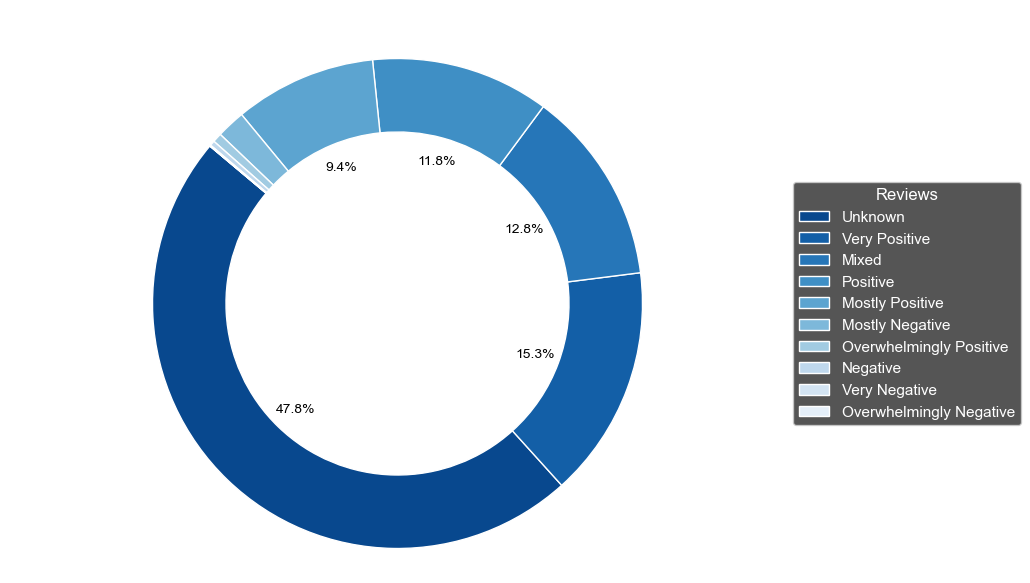

In [99]:
reviews_counts = data['Reviews Summary'].value_counts()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if pct < 5:
        return "" 
    return "{:.1f}%".format(pct)

plt.rcParams['axes.facecolor'] = '#2B2B2B'
plt.rcParams['text.color'] = 'white'


plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(reviews_counts, labels=reviews_counts.index, autopct=lambda pct: func(pct, reviews_counts), 
                                   startangle=140, wedgeprops=dict(width=0.3), colors=sns.color_palette("Blues_r", len(reviews_counts)))
plt.title("Distribution of Review Categories (Donut Chart)", fontsize=16, color='white')
plt.axis('equal')
plt.legend(wedges, reviews_counts.index, title="Reviews", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, color="black", fontsize=10)  
plt.show()

In [100]:
data.to_csv('for_analysis.csv', index=False, encoding='utf-8')